# CDV study - data eploration & dataset preparation

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
#%pylab inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE, SelectKBest, chi2, SelectFromModel
from sklearn.utils import resample

In [2]:
path_project = Path.home() / Path('Google Drive/Felix')
path_data = path_project / Path("data")
path_dump = path_project / Path("dump")

## I - CDV study - Data exploration

In [3]:
# loading cdv data
file = path_data / Path("felix.csv")
with Path.open(file, 'rb') as fp:
    cdv = pd.read_csv(fp,  encoding='cp1252',low_memory=False)

In [4]:
cdv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11131 entries, 0 to 11130
Columns: 354 entries, INTER6 to an_nais
dtypes: float64(47), int64(15), object(292)
memory usage: 30.1+ MB


In [5]:
# loadind cdv data without format
file = path_data / Path("felix_ssfmt.csv")
with Path.open(file, 'rb') as fp:
    cdv_ssfmt = pd.read_csv(fp,  encoding='cp1252',low_memory=False)

In [6]:
cdv_ssfmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11131 entries, 0 to 11130
Columns: 354 entries, INTER6 to an_nais
dtypes: float64(153), int64(190), object(11)
memory usage: 30.1+ MB


## 1) Dataset Size and missing values analysis

### a) Differences between "cdv.csv" & "cdv_ssfmt.csv"

In [7]:
print(f"Number of different columns between 'cdv.csv' & 'cdv_ssfmt.csv' : \
{np.sum(cdv_ssfmt.columns != cdv.columns)}")

Number of different columns between 'cdv.csv' & 'cdv_ssfmt.csv' : 0


In [8]:
# insight on exemple 
A = cdv.loc[:,["INTER6","INTER","ANNEEFUZ","ANNEFUZ2","AGGLO9",
               "DIPLOME","COLLECTE","CHAMP","POND"]].dropna()
B = cdv_ssfmt.loc[:,["INTER6","INTER","ANNEEFUZ","ANNEFUZ2","AGGLO9",
                     "DIPLOME","COLLECTE","CHAMP","POND"]].dropna()

In [9]:
A.head()

,INTER6,INTER,ANNEEFUZ,ANNEFUZ2,AGGLO9,DIPLOME,COLLECTE,CHAMP,POND
0,373001,3001,2015,2015 online,5 000 à 10 000 habitants,"BEPC, brevet des collèges",Online,18 ans et + métropole,1.313554
1,373002,3002,2015,2015 online,2 000 à 5 000 habitants,"BEPC, brevet des collèges",Online,18 ans et + métropole,2.009015
2,373003,3003,2015,2015 online,Agglomération parisienne,Bac + 3 et supérieur,Online,18 ans et + métropole,0.217607
3,373004,3004,2015,2015 online,[Nsp],Bac + 3 et supérieur,Online,18 ans et + métropole,0.539351
4,373005,3005,2015,2015 online,2 000 à 5 000 habitants,Bac + 3 et supérieur,Online,18 ans et + métropole,0.270204


In [10]:
B.head()

,INTER6,INTER,ANNEEFUZ,ANNEFUZ2,AGGLO9,DIPLOME,COLLECTE,CHAMP,POND
0,373001,3001,37,371,3,3,2,1,1.313554
1,373002,3002,37,371,2,3,2,1,2.009015
2,373003,3003,37,371,9,7,2,1,0.217607
3,373004,3004,37,371,10,7,2,1,0.539351
4,373005,3005,37,371,2,7,2,1,0.270204


In [11]:
diff = np.sum(cdv != cdv_ssfmt)

Variable without any différences

In [12]:
len(diff[diff == 0])

17

In [13]:
diff[diff == 0]

INTER6      0
INTER       0
POND        0
DPT         0
COMINSEE    0
AGE         0
NB0003      0
NB0306      0
NB0610      0
NB1016      0
NB1620      0
NB2099      0
REVENQ      0
AUTREREV    0
REVTOT6     0
an_enq      0
an_nais     0
dtype: int64

In [14]:
cdv[diff[diff == 0].index].dtypes

INTER6        int64
INTER         int64
POND        float64
DPT          object
COMINSEE     object
AGE           int64
NB0003        int64
NB0306        int64
NB0610        int64
NB1016        int64
NB1620        int64
NB2099        int64
REVENQ        int64
AUTREREV      int64
REVTOT6       int64
an_enq        int64
an_nais       int64
dtype: object

In [15]:
cdv[diff[diff == 0].index].head()

,INTER6,INTER,POND,DPT,COMINSEE,AGE,NB0003,NB0306,NB0610,NB1016,NB1620,NB2099,REVENQ,AUTREREV,REVTOT6,an_enq,an_nais
0,373001,3001,1.313554,29,29027,56,0,0,0,0,0,0,1100,0,2,2015,1959
1,373002,3002,2.009015,46,46137,64,0,0,0,0,0,0,2000,0,4,2015,1951
2,373003,3003,0.217607,34,34172,71,0,0,0,0,0,0,5000,0,5,2015,1944
3,373004,3004,0.539351,91,91021,21,0,0,0,0,0,0,200,0,1,2015,1994
4,373005,3005,0.270204,23,23021,70,0,0,0,0,0,0,998,0,3,2015,1945


In [16]:
scope_identical = diff[diff == 0].index

Variable with différences

In [17]:
diff[diff != 0]

ANNEEFUZ       11131
ANNEFUZ2       11131
COLLECTE       11131
CHAMP          11131
identifiant     8115
SEXE           11131
AGE5           11131
PCSENQ8        11131
TYPOSQT        11131
DIPL4          11131
AGGLO5         11131
UDA10          11131
SITUEMP3       11131
AGEDIP2        11131
AGGLO9         11131
DIPLOME        11131
EXERCPRO       11131
SITUEMP        11131
SITUEMP5       11131
SITUEMP6       11131
SALCOMP        11131
TYPEMPL        11131
INTERIM        11131
TYPCONT        11131
TEMPSTRA       11131
nbheures        5242
NBHEUR39       11131
NBHEUR35       11131
PREFPALI       11131
SALCOMPI       11131
               ...  
poppeud         5134
poptrpeu        5134
agedip          8115
AUTREAL        11131
age_OW          8115
UDA5           11131
CSP6            8115
CP              8115
TYPLOG          8115
inseel          2259
inseenum        8115
couple2        11131
cpt             8115
AGE6           11131
PCSRED10       11131
prescaf        11130
refus2       

In [18]:
cdv[diff[diff != 0].index].dtypes

ANNEEFUZ         int64
ANNEFUZ2        object
COLLECTE        object
CHAMP           object
identifiant     object
SEXE            object
AGE5            object
PCSENQ8         object
TYPOSQT         object
DIPL4           object
AGGLO5          object
UDA10           object
SITUEMP3        object
AGEDIP2         object
AGGLO9          object
DIPLOME         object
EXERCPRO        object
SITUEMP         object
SITUEMP5        object
SITUEMP6        object
SALCOMP         object
TYPEMPL         object
INTERIM         object
TYPCONT         object
TEMPSTRA        object
nbheures       float64
NBHEUR39        object
NBHEUR35        object
PREFPALI        object
SALCOMPI        object
                ...   
poppeud        float64
poptrpeu       float64
agedip         float64
AUTREAL         object
age_OW         float64
UDA5            object
CSP6           float64
CP             float64
TYPLOG         float64
inseel          object
inseenum       float64
couple2         object
cpt        

In [19]:
scope_diff = diff[diff != 0].index

#### Understanding of the differences

In [20]:
typ = cdv[scope_diff].dtypes 
scope_obj = typ[typ=='object'].index
scope_notobj = typ[typ!='object'].index
print(f"Number variable with difference having'object' as type :\
{len(scope_obj)}")
print(f"Number variable with difference having other type :\
{len(scope_notobj)}")

Number variable with difference having'object' as type :290
Number variable with difference having other type :47


1) Zoom in variable with 'object' type

In [21]:
scope_obj_long = []
scope_obj_diff = []
scope_no_diff = []
for c in scope_obj:
    cdv_c_dropna = cdv[c].dropna()
    cdv_ssfmt_c_dropna = cdv_ssfmt[c].dropna()
    if np.sum(cdv_c_dropna != cdv_ssfmt_c_dropna) > 0:    
        cdv_valct = cdv[c].value_counts()
        cdv_ssfmt_valct = cdv_ssfmt[c].value_counts()
        if len(cdv_valct) > 15: 
            print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
            print(f"!!!!!!!!!! {len(cdv_ssfmt_valct)} modalitées !!!!!!!!!!!!!!")
            print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
            scope_obj_long.append(c)
        scope_obj_diff.append(c)
        print(f"***{c}***")
        print()
        print(cdv_ssfmt[c].value_counts())
        print()
        print(cdv[c].value_counts())
        print("--------------\n")
    else:
        scope_no_diff.append(c)
        print(f"***{c}***")
        print("NO DIFFERENCE")
        print("--------------\n")

***ANNEFUZ2***

380    3050
390    3020
400    3016
371    2045
Name: ANNEFUZ2, dtype: int64

2016           3050
2017           3020
2018           3016
2015 online    2045
Name: ANNEFUZ2, dtype: int64
--------------

***COLLECTE***

2    11131
Name: COLLECTE, dtype: int64

Online    11131
Name: COLLECTE, dtype: int64
--------------

***CHAMP***

1    10574
2      557
Name: CHAMP, dtype: int64

18 ans et + métropole      10574
15-17 ans + DOM + Corse      557
Name: CHAMP, dtype: int64
--------------

***identifiant***
NO DIFFERENCE
--------------

***SEXE***

2    5848
1    5283
Name: SEXE, dtype: int64

Femme    5848
Homme    5283
Name: SEXE, dtype: int64
--------------

***AGE5***

3    3945
2    2203
5    1732
1    1686
4    1565
Name: AGE5, dtype: int64

40 à 59 ans        3945
25 à 39 ans        2203
70 ans et plus     1732
Moins de 25 ans    1686
60 à 69 ans        1565
Name: AGE5, dtype: int64
--------------

***PCSENQ8***

7    2968
4    1909
3    1570
5    1379
8    1237
2   

***SALCOMPI***

1.0    3864
2.0     308
3.0     155
Name: SALCOMPI, dtype: int64

Salarié                 3864
À votre compte           308
N'a jamais travaillé     155
Name: SALCOMPI, dtype: int64
--------------

***CHERCHEM***

2    8816
1    2279
3      36
Name: CHERCHEM, dtype: int64

Non      8816
Oui      2279
[Nsp]      36
Name: CHERCHEM, dtype: int64
--------------

***IMAGTRAV***

2.0    2076
3.0     592
1.0     333
4.0      15
Name: IMAGTRAV, dtype: int64

Un moyen de gagner sa vie                 2076
Une source d'épanouissement, de fierté     592
Une source de stress, de mal-être          333
[Nsp]                                       15
Name: IMAGTRAV, dtype: int64
--------------

***COUPLE***

1.0    5437
3.0    2900
2.0     749
Name: COUPLE, dtype: int64

Oui, avec une personne qui vit dans le logement           5437
Non                                                       2900
Oui, avec une personne qui ne vit pas dans le logement     749
Name: COUPLE, dtype: int64
--

***STATLOGB***

2.0    3877
3.0    1861
1.0    1509
4.0    1049
5.0     762
6.0      28
Name: STATLOGB, dtype: int64

Propriétaire                                                   3877
Locataire ou sous-locataire parc privé                         1861
Accédant à la propriété en cours de remboursement d'emprunt    1509
Locataire ou sous-locataire parc social                        1049
Logé gratuitement                                               762
Autre                                                            28
Name: STATLOGB, dtype: int64
--------------

***STATLOG4***

2    4857
3    4381
1    1855
4      28
5      10
Name: STATLOG4, dtype: int64

Propriétaire                                     4857
Locataire,sous-locataire ou logé gratuitement    4381
Accédant à la propriété                          1855
Autre                                              28
[Nsp]                                              10
Name: STATLOG4, dtype: int64
--------------

***DEPLOG***

2   

Homme    3916
Femme    3860
Name: SEXE_2, dtype: int64
--------------

***SEXE_3***

2.0    2054
1.0    1925
Name: SEXE_3, dtype: int64

Femme    2054
Homme    1925
Name: SEXE_3, dtype: int64
--------------

***SEXE_4***

2.0    1197
1.0    1134
Name: SEXE_4, dtype: int64

Femme    1197
Homme    1134
Name: SEXE_4, dtype: int64
--------------

***SEXE_5***

1.0    442
2.0    389
Name: SEXE_5, dtype: int64

Homme    442
Femme    389
Name: SEXE_5, dtype: int64
--------------

***SEXE_6***

2.0    118
1.0     93
Name: SEXE_6, dtype: int64

Femme    118
Homme     93
Name: SEXE_6, dtype: int64
--------------

***SEXE_7***

1.0    28
2.0    25
Name: SEXE_7, dtype: int64

Homme    28
Femme    25
Name: SEXE_7, dtype: int64
--------------

***SEXE_8***

2.0    18
1.0     6
Name: SEXE_8, dtype: int64

Femme    18
Homme     6
Name: SEXE_8, dtype: int64
--------------

***SEXE_9***

1.0    5
2.0    2
Name: SEXE_9, dtype: int64

Homme    5
Femme    2
Name: SEXE_9, dtype: int64
--------------

***LIE

2    5421
3    3548
1    1328
4     734
5     100
Name: INNOVTEC, dtype: int64

Assez attiré          5421
Peu attiré            3548
Très attiré           1328
Pas du tout attiré     734
[Nsp]                  100
Name: INNOVTEC, dtype: int64
--------------

***TELMOB***

1    10630
2      407
3       94
Name: TELMOB, dtype: int64

Oui      10630
Non        407
[Nsp]       94
Name: TELMOB, dtype: int64
--------------

***PRATCOLL***

4.0    5518
2.0    1600
3.0    1497
1.0     390
5.0      54
Name: PRATCOLL, dtype: int64

Jamais               5518
De temps en temps    1600
Rarement             1497
Souvent               390
[Nsp]                  54
Name: PRATCOLL, dtype: int64
--------------

***CONFWEB***

2.0    4504
3.0    3226
4.0     906
1.0     336
5.0     114
Name: CONFWEB, dtype: int64

Assez confiance          4504
Peu confiance            3226
Pas du tout confiance     906
Très confiance            336
[Nsp]                     114
Name: CONFWEB, dtype: int64
--------------

--------------

***CONFASSO***

2    7061
3    2330
1     852
4     691
5     197
Name: CONFASSO, dtype: int64

Plutôt confiance         7061
Plutôt pas confiance     2330
Très confiance            852
Pas du tout confiance     691
[Nsp]                     197
Name: CONFASSO, dtype: int64
--------------

***CONFPOLI***

4    4700
3    4543
2    1524
5     201
1     163
Name: CONFPOLI, dtype: int64

Pas du tout confiance    4700
Plutôt pas confiance     4543
Plutôt confiance         1524
[Nsp]                     201
Très confiance            163
Name: CONFPOLI, dtype: int64
--------------

***CONFBANK***

3.0    3624
2.0    2987
4.0    2079
1.0     239
5.0     157
Name: CONFBANK, dtype: int64

Plutôt pas confiance     3624
Plutôt confiance         2987
Pas du tout confiance    2079
Très confiance            239
[Nsp]                     157
Name: CONFBANK, dtype: int64
--------------

***CONFPRES***

3.0    4186
2.0    2556
4.0    2008
1.0     180
5.0     156
Name: CONFPRES, dtype: in


Non, je ne comprends pas    2609
Oui, je comprends            359
[Nsp]                         48
Name: RADI3, dtype: int64
--------------

***OPICULT***

1.0    4603
2.0    4250
3.0     233
Name: OPICULT, dtype: int64

La diversité des cultures est une richesse                   4603
La diversité des cultures rend difficile la vie en commun    4250
[Nsp]                                                         233
Name: OPICULT, dtype: int64
--------------

***COMMU1***

2.0    2284
1.0     594
3.0     138
Name: COMMU1, dtype: int64

Non      2284
Oui       594
[Nsp]     138
Name: COMMU1, dtype: int64
--------------

***COMMU2***

2.0    2063
1.0     828
3.0     125
Name: COMMU2, dtype: int64

Non      2063
Oui       828
[Nsp]     125
Name: COMMU2, dtype: int64
--------------

***COMMU3***

2.0    2434
1.0     463
3.0     119
Name: COMMU3, dtype: int64

Non      2434
Oui       463
[Nsp]     119
Name: COMMU3, dtype: int64
--------------

***COMMU4***

2.0    2030
1.0     874
3.0     1

--------------

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
!!!!!!!!!! 34 modalitées !!!!!!!!!!!!!!
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
***PCSENQ35***

28    1258
34    1134
23    1009
29     750
20     632
30     622
35     595
18     546
16     366
21     359
12     338
24     332
9      313
15     288
22     259
17     230
10     218
14     211
3      190
27     179
6      156
5      152
31     148
2      142
7      137
11     132
19     113
32     103
4       87
1       43
25      38
8       35
26      11
13       5
Name: PCSENQ35, dtype: int64

Ancien cadre                                               1258
Élève, étudiant                                            1134
Ouvrier qualifié                                           1009
Ancienne profession intermédiaire                           750
Employé administratif d'entreprise                          632
Ancien employé                                              622
Personne au foyer et autre inactif                          

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
!!!!!!!!!! 23 modalitées !!!!!!!!!!!!!!
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
***UDA23***

12    1988
22    1120
21     841
17     716
18     646
6      619
2      584
7      486
16     478
13     472
15     463
19     303
5      295
11     288
20     279
1      268
4      261
23     239
8      225
3      212
10     198
14     112
9       38
Name: UDA23, dtype: int64

Ile de France                 1988
Rhône-Alpes                   1120
Provence Alpes Côte d'Azur     841
Nord Pas de Calais             716
Pays de la Loire               646
Bretagne                       619
Aquitaine                      584
Centre                         486
Midi-Pyrénées                  478
Languedoc-Roussillon           472
Lorraine                       463
Picardie                       303
Bourgogne                      295
Haute-Normandie                288
Poitou-Charente                279
Alsace                         268
Basse-Normandie            

In [22]:
print(f"Includes {len(scope_no_diff)} other identical variables :\n\
{' '.join(scope_no_diff)}")
scope_identical = scope_identical.union(pd.Index(scope_no_diff))
print(f"total number of identical variables {len(scope_identical)}")

Includes 9 other identical variables :
identifiant RADIQUOI statut99 RURAURBA inseel info com type99 DEPCOM
total number of identical variables 26


In [23]:
print(f"variable with more than 15 modalities :\n{scope_obj_long}")

variable with more than 15 modalities :
['PCSENQ36', 'PCSCONJ', 'PCSENQ35', 'PCSENQ32', 'PCSENQ24', 'UDA23']


In [24]:
df_tmp = cdv.loc[:,scope_obj_long].dropna()
df_tmp.head()

,PCSENQ36,PCSCONJ,PCSENQ35,PCSENQ32,PCSENQ24,UDA23
9,Chef d'entreprise 10 salariés ou plus,Profession libérale,Chef d'entreprise 10 salariés ou plus,Chef d'entreprise 10 salariés ou plus,Chef d'entreprise de 10 salariés ou plus,Provence Alpes Côte d'Azur
12,Ancien employé,"Employé civil, agent de service fonction publique",Ancien employé,Retraité,Ancien employé et ouvrier,Franche-Comté
18,Profession inter. adm. et comm. des entreprises,Cadre administratif et commercial d'entreprise,Profession inter. adm. et comm. des entreprises,Profession inter. adm. et com. des entreprises,Prof. inter. administrative et commerciale des...,Bretagne
20,Technicien,"Contremaître, agent de maîtrise",Technicien,Technicien,Technicien,Lorraine
32,"Contremaître, agent de maîtrise",Technicien,"Contremaître, agent de maîtrise","Contremaître, agent de maîtrise","Contremaître, agent de maîtrise",Rhône-Alpes


In [25]:
cdv['PCSENQ36'].value_counts()

Ancien cadre                                                 1258
Élève, étudiant                                              1134
Ouvrier qualifié                                             1009
Ancienne profession intermédiaire                             750
Employé administratif d'entreprise                            632
Ancien employé                                                622
Employé civil, agent de service fonction publique             546
Personne au foyer                                             477
Technicien                                                    366
Employé de commerce                                           359
Profession intermédiaire de la santé et du travail social     338
Ouvrier non qualifié                                          332
Cadre administratif et commercial d'entreprise                313
Profession inter. adm. et comm. des entreprises               288
Personnel des services directs aux particuliers               259
Contremaît

In [26]:
cdv['UDA23'].value_counts()

Ile de France                 1988
Rhône-Alpes                   1120
Provence Alpes Côte d'Azur     841
Nord Pas de Calais             716
Pays de la Loire               646
Bretagne                       619
Aquitaine                      584
Centre                         486
Midi-Pyrénées                  478
Languedoc-Roussillon           472
Lorraine                       463
Picardie                       303
Bourgogne                      295
Haute-Normandie                288
Poitou-Charente                279
Alsace                         268
Basse-Normandie                261
DOM                            239
Champagne-Ardennes             225
Auvergne                       212
Franche-Comté                  198
Limousin                       112
Corse                           38
Name: UDA23, dtype: int64

2) variable with difference between cdv & cdv_ssfmt with other type

In [27]:
print(" ".join(scope_notobj))

ANNEEFUZ nbheures NBENF NBPIECES SENSIENV NBPERS AGE_2 AGE_3 AGE_4 AGE_5 AGE_6 AGE_7 AGE_8 AGE_9 REVPF NOT_FAMI NOT_PROF NOT_AMIS NOT_COHE NOT_POLI NOT_LIBR NOT_LOG NOT_CAD REVCONJ REVAUTR REVTOT NBUC REVUC REVsqt typodeg popdense popinter poppeud poptrpeu agedip age_OW CSP6 CP TYPLOG inseenum cpt prescaf refus2 med i AGGLOINS pmun


In [28]:
cdv.loc[:,scope_notobj].head()

,ANNEEFUZ,nbheures,NBENF,NBPIECES,SENSIENV,NBPERS,AGE_2,AGE_3,AGE_4,AGE_5,...,CP,TYPLOG,inseenum,cpt,prescaf,refus2,med,i,AGGLOINS,pmun
0,2015,35.0,NaN,7.0,7.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,NaN,3.0,5.0,6.0,2.0,61.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,NaN,3.0,8.0,4.0,2.0,82.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,NaN,NaN,1.0,6.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,NaN,5.0,7.0,5.0,2.0,60.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
cdv_ssfmt.loc[:,scope_notobj].head()

,ANNEEFUZ,nbheures,NBENF,NBPIECES,SENSIENV,NBPERS,AGE_2,AGE_3,AGE_4,AGE_5,...,CP,TYPLOG,inseenum,cpt,prescaf,refus2,med,i,AGGLOINS,pmun
0,37,35.0,NaN,7.0,7.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37,NaN,3.0,5.0,6.0,2.0,61.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37,NaN,3.0,8.0,4.0,2.0,82.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37,NaN,NaN,1.0,6.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37,NaN,5.0,7.0,5.0,2.0,60.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
scope_notobj_diff = []
scope_notobj_identical = []
for c in scope_notobj:
    cdv_c_dropna = cdv[c].dropna()
    cdv_ssfmt_c_dropna = cdv_ssfmt[c].dropna()
    if np.sum(cdv_c_dropna != cdv_ssfmt_c_dropna) > 0:
        scope_notobj_diff.append(c)
        print(f"{c} : difference")
    else:
        print(f"{c} : indentical")
        scope_notobj_identical.append(c)

ANNEEFUZ : difference
nbheures : indentical
NBENF : indentical
NBPIECES : indentical
SENSIENV : indentical
NBPERS : indentical
AGE_2 : indentical
AGE_3 : indentical
AGE_4 : indentical
AGE_5 : indentical
AGE_6 : indentical
AGE_7 : indentical
AGE_8 : indentical
AGE_9 : indentical
REVPF : indentical
NOT_FAMI : indentical
NOT_PROF : indentical
NOT_AMIS : indentical
NOT_COHE : indentical
NOT_POLI : indentical
NOT_LIBR : indentical
NOT_LOG : indentical
NOT_CAD : indentical
REVCONJ : indentical
REVAUTR : indentical
REVTOT : indentical
NBUC : indentical
REVUC : indentical
REVsqt : indentical
typodeg : indentical
popdense : indentical
popinter : indentical
poppeud : indentical
poptrpeu : indentical
agedip : indentical
age_OW : indentical
CSP6 : indentical
CP : indentical
TYPLOG : indentical
inseenum : indentical
cpt : indentical
prescaf : indentical
refus2 : indentical
med : indentical
i : indentical
AGGLOINS : indentical
pmun : indentical


In [31]:
print(f"Includes {len(scope_notobj_identical)} other identical variables :\n\n\
{' '.join(scope_notobj_identical)}")
scope_identical = scope_identical.union(pd.Index(scope_notobj_identical))

Includes 46 other identical variables :

nbheures NBENF NBPIECES SENSIENV NBPERS AGE_2 AGE_3 AGE_4 AGE_5 AGE_6 AGE_7 AGE_8 AGE_9 REVPF NOT_FAMI NOT_PROF NOT_AMIS NOT_COHE NOT_POLI NOT_LIBR NOT_LOG NOT_CAD REVCONJ REVAUTR REVTOT NBUC REVUC REVsqt typodeg popdense popinter poppeud poptrpeu agedip age_OW CSP6 CP TYPLOG inseenum cpt prescaf refus2 med i AGGLOINS pmun


In [32]:
scope_difference = pd.Index(scope_notobj_diff).union(pd.Index(scope_obj_diff))

In [33]:
print(f"Total number of identical variables : {len(scope_identical)}")
print(f"Total number of variables with difference : {len(scope_difference)}")

Total number of identical variables : 72
Total number of variables with difference : 282


**Conclusion : ** The 2 dataset are almost identical. They differ only by encoding on 282 variables. The other 72 variables are totally identical.

### b) First anlysis regarless of the year of the study

In [34]:
print(f"Number of records: {cdv.shape[0]}")
print(f"Number of variables: {cdv.shape[1]}")

Number of records: 11131
Number of variables: 354


In [35]:
print(f"List of {cdv.shape[1]} variables names:\n")
print(" ".join(cdv.columns))

List of 354 variables names:

INTER6 INTER ANNEEFUZ ANNEFUZ2 COLLECTE CHAMP POND identifiant SEXE AGE5 PCSENQ8 TYPOSQT DIPL4 AGGLO5 UDA10 SITUEMP3 AGEDIP2 DPT COMINSEE AGGLO9 AGE DIPLOME EXERCPRO SITUEMP SITUEMP5 SITUEMP6 SALCOMP TYPEMPL INTERIM TYPCONT TEMPSTRA nbheures NBHEUR39 NBHEUR35 PREFPALI SALCOMPI CHERCHEM IMAGTRAV COUPLE STATMAT STATMAT4 ACTCONJ SALCOMPC ENFANTS NBENF NBENF6 FAMILLE UNIONGAY ADOPTGAY TRAVFEM NB0003 NB0306 NB0610 NB1016 NB1620 NB2099 NB03_4 NB06_4 NB10_4 NB16_4 NB20_4 NB99_4 NB03_2 NB06_2 NB10_2 NB16_2 NB20_2 NB99_2 SITUFAM RESIDALT NBPIECES NBPIECE6 LOGSUFFI STATLOGB STATLOG4 DEPLOG DEPLOG3 CADVIE CADVIE3 SECURITE SECUR3 MODCHAUF TYPCHAUF VOITURE CONDUIT CHOIXNUC SENSIENV TAXENV HANDICAP SOUFFTET SOUFFDOS SOUFFNER SOUFFDEP SOUFFINS ETATSAN LIMVIAND WHYLIM ADNSTIC ADNCB ADNORDI ROBOT1 ROBOT2 ROBOT3 NBPERS NBPERS5 SEXE_2 SEXE_3 SEXE_4 SEXE_5 SEXE_6 SEXE_7 SEXE_8 SEXE_9 AGE_2 AGE_3 AGE_4 AGE_5 AGE_6 AGE_7 AGE_8 AGE_9 LIEN_2 LIEN_3 LIEN_4 LIEN_5 LIEN_6 LIEN_7 LIE

In [36]:
print(f"Number of lines without missing values : \
{cdv.dropna().shape[0]} out of {cdv.shape[0]}")

Number of lines without missing values : 0 out of 11131


In [37]:
nb_missing_per_var = np.sum(cdv.isnull()) 

In [38]:
print("Number of missing values per variables :")
nb_missing_per_var.sort_values(ascending=False).head(50)

Number of missing values per variables :


prescaf     11130
SEXE_9      11124
AGE_9       11123
LIEN_9      11123
SEXE_8      11107
LIEN_8      11106
AGE_8       11106
SEXE_7      11078
AGE_7       11077
LIEN_7      11076
AUTREAL     10995
SEXE_6      10920
AGE_6       10909
LIEN_6      10906
SEXE_5      10300
LIEN_5      10228
AGE_5       10226
RADIQUOI    10146
RADWHY3      9959
RADWHY9      9959
RADWHY2      9959
RADWHY4      9959
RADWHY1      9959
RADWHY7      9959
RADWHY8      9959
RADWHY5      9959
RADWHY10     9959
RADWHY11     9959
RADWHY12     9959
RADWHY13     9959
RADWHY14     9959
RADWHY6      9959
WHYLIM       9474
REVAUTR      9101
SEXE_4       8800
AGE_4        8525
LIEN_4       8518
med          8232
UDA5         8200
COMMU4       8115
RADI3        8115
COMMU1       8115
COMMU3       8115
RADI1        8115
COMMU5       8115
COMMU6       8115
COMMU7       8115
COMMU8       8115
RADI2        8115
LIMVIAND     8115
dtype: int64

In [39]:
n_complete = len(nb_missing_per_var[nb_missing_per_var == 0])
n_uncomplete = len(nb_missing_per_var[nb_missing_per_var != 0])
print(f"Number of variables without missing values :\
{n_complete} out of {cdv.shape[1]} variable")
print(f"Number of variables with at least one missing values :\
{n_uncomplete} out of {cdv.shape[1]} variable")

Number of variables without missing values :193 out of 354 variable
Number of variables with at least one missing values :161 out of 354 variable


In [40]:
complete_variables = nb_missing_per_var[nb_missing_per_var == 0].index
uncomplete_variables = nb_missing_per_var[nb_missing_per_var != 0].index
print(f"List of {n_complete} variables without missing values names:\n")
print(" ".join(complete_variables))
print(f"\nList of {n_uncomplete} variables with at least 1 missing value:\n")
print(" ".join(uncomplete_variables))

List of 193 variables without missing values names:

INTER6 INTER ANNEEFUZ ANNEFUZ2 COLLECTE CHAMP POND SEXE AGE5 PCSENQ8 TYPOSQT DIPL4 AGGLO5 UDA10 SITUEMP3 AGEDIP2 DPT COMINSEE AGGLO9 AGE DIPLOME EXERCPRO SITUEMP SITUEMP5 SITUEMP6 CHERCHEM STATMAT STATMAT4 ENFANTS NBENF6 FAMILLE UNIONGAY ADOPTGAY TRAVFEM NB0003 NB0306 NB0610 NB1016 NB1620 NB2099 NB03_4 NB06_4 NB10_4 NB16_4 NB20_4 NB99_4 NB03_2 NB06_2 NB10_2 NB16_2 NB20_2 NB99_2 NBPIECE6 LOGSUFFI STATLOG4 DEPLOG DEPLOG3 CADVIE CADVIE3 SECURITE SECUR3 MODCHAUF TYPCHAUF VOITURE CONDUIT CHOIXNUC TAXENV HANDICAP SOUFFTET SOUFFDOS SOUFFNER SOUFFDEP SOUFFINS ETATSAN NBPERS5 PRESTCAF RESTRICT NIVPERSO NIVPERS4 NIVFRAN NIVFRAN4 CDV5 CDV5_4 NBCHOM BANQMOB BANQEPA BANQVIE INNOVTEC TELMOB VACANCES FREQSPOR FREQBIBL FREQCINE FREQTELE ASSOSPOR ASSOCULT ASSOCONF ASSOJEUN ASSOSYND ASSOENVI ASSOPARE ASSOCONS ASSOPOLI ASSOHUMA ASSO11_2 ASSO11_3 ASSO6_2 ASSO10_2 ASSO10_3 AIDESUFF EFFORTPP RAISPAUV CHOAVANT CHOVOLON OPIRSA JUSTICE CONFPUB CONFENTR CONFA

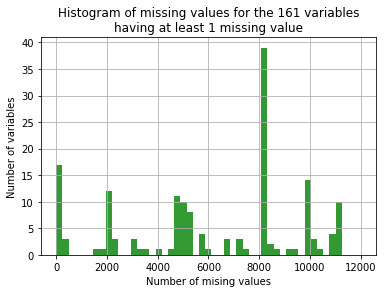

In [41]:
fig=plt.figure()
plt.title("Histogram of missing values for the 161 variables\n\
having at least 1 missing value")
plt.ylabel(u'Number of variables')
plt.xlabel("Number of mising values")
bins = np.linspace(0, 12000,50)
plt.hist(nb_missing_per_var[uncomplete_variables], 
         bins, facecolor='g', alpha=0.8)
plt.grid()

### b) Year of realisation of the study and missing values
Variables **ANNEEFUZ** & **ANNEFUZ2** seems equivalent   

***According to the authors of the study : ***   
En **2015**, l’enquête a été menée à la fois en face-à-face (**2 000 personnes** interrogées) et aussi online (2 000 personnes également) tous **âgés de 18 ans et plus**, résidant en **France métropolitaine (hors Corse)**.
Seuls les 2000 enregistrements correspondants à l'énquête online sont présents dans le dataset.   
**A partir de 2016**, le mode de collecte est passé en ligne et on interroge désormais **3 000 individus âgés de 15 ans et plus en France entière** (France métropolitaine, Corse et DOM-TOM).   


In [42]:
cdv["ANNEEFUZ"].unique()

array([2015, 2016, 2017, 2018])

In [43]:
cdv["ANNEFUZ2"].unique()

array(['2015 online', '2016', '2017', '2018'], dtype=object)

In [44]:
nb_enregistrements_anneefuz =  cdv["ANNEEFUZ"].value_counts().sort_values(ascending = False)
print("Number of records per year 'ANNEEFUZ':")
nb_enregistrements_anneefuz

Number of records per year 'ANNEEFUZ':


2016    3050
2017    3020
2018    3016
2015    2045
Name: ANNEEFUZ, dtype: int64

In [45]:
nb_enregistrements_annefuz2 =  cdv["ANNEFUZ2"].value_counts()
print("Number of records per year 'ANNEFUZ2':")
nb_enregistrements_annefuz2

Number of records per year 'ANNEFUZ2':


2016           3050
2017           3020
2018           3016
2015 online    2045
Name: ANNEFUZ2, dtype: int64

In [46]:
B =  cdv.ANNEEFUZ.astype(str)
R = cdv.loc[B != cdv["ANNEFUZ2"],["ANNEEFUZ","ANNEFUZ2"]]
print(R["ANNEFUZ2"].unique())
print(R["ANNEEFUZ"].unique())

['2015 online']
[2015]


In [47]:
# number of missing value per variable for a given year
na_2015 = np.sum(cdv.loc[cdv["ANNEEFUZ"] == 2015].isnull()) 
na_2016 = np.sum(cdv.loc[cdv["ANNEEFUZ"] == 2016].isnull()) 
na_2017 = np.sum(cdv.loc[cdv["ANNEEFUZ"] == 2017].isnull()) 
na_2018 = np.sum(cdv.loc[cdv["ANNEEFUZ"] == 2018].isnull()) 

In [48]:
complete_2015 = set(na_2015[na_2015==0].index)
complete_2016 = set(na_2016[na_2016==0].index)
complete_2017 = set(na_2017[na_2017==0].index)
complete_2018 = set(na_2018[na_2018==0].index)

In [49]:
print(f"Number of variable without any missing values in 2015: {len(complete_2015)}")
print(f"Number of variable without any missing values in 2016: {len(complete_2017)}")
print(f"Number of variable without any missing values in 2017: {len(complete_2017)}")
print(f"Number of variable without any missing values in 2018: {len(complete_2018)}")

Number of variable without any missing values in 2015: 199
Number of variable without any missing values in 2016: 224
Number of variable without any missing values in 2017: 224
Number of variable without any missing values in 2018: 257


In [50]:
missing_2015 = set(na_2015[na_2015==2045].index)
missing_2016 = set(na_2016[na_2016==3050].index)
missing_2017 = set(na_2017[na_2017==3020].index)
missing_2018 = set(na_2018[na_2018==3016].index)

In [51]:
print(f"Number of variable totally missing in 2015: {len(missing_2015)}")
print(f"Number of variable totally missing in 2016: {len(missing_2016)}")
print(f"Number of variable totally missing in 2017: {len(missing_2017)}")
print(f"Number of variable totally missing in 2018: {len(missing_2018)}")

Number of variable totally missing in 2015: 82
Number of variable totally missing in 2016: 73
Number of variable totally missing in 2017: 56
Number of variable totally missing in 2018: 1


In [52]:
full_scope = set(cdv.columns)
scope_2015 = full_scope - missing_2015
scope_2016 = full_scope - missing_2016
scope_2017 = full_scope - missing_2017
scope_2018 = full_scope - missing_2018

In [53]:
print(f"Number of variable used 2015: {len(scope_2015)}")
print(f"Number of variable used 2016: {len(scope_2016)}")
print(f"Number of variable used 2017: {len(scope_2017)}")
print(f"Number of variable used 2018: {len(scope_2018)}")

Number of variable used 2015: 272
Number of variable used 2016: 281
Number of variable used 2017: 298
Number of variable used 2018: 353


**Synthesis of variable evolution over the period**

In [54]:
print(f"2016 vs 2015\n\tNew variable ({len(scope_2016 - scope_2015)}):")
print(" ".join(scope_2016 - scope_2015))
print(f"\tVariable dropped ({len(scope_2015 - scope_2016)}):")
print(" ".join(scope_2015 - scope_2016))
print(f"\n2017 vs 2016\n\tNew variable ({len(scope_2017 - scope_2016)}):")
print(" ".join(scope_2017 - scope_2016))
print(f"\tVariable dropped ({len(scope_2016 - scope_2017)}):")
print(" ".join(scope_2016 - scope_2017))
print(f"\n2018 vs 2017\n\tNew variable ({len(scope_2018 - scope_2017)}):")
print(" ".join(scope_2018 - scope_2017))
print(f"\tVariable dropped ({len(scope_2017 - scope_2018)}):")
print(" ".join(scope_2017 - scope_2018))

2016 vs 2015
	New variable (13):
CONFECOL CONFKEUF COUPLE inseel AGE6 STATLOGB CONFWEB AGGLOINS CONFBANK OPICULT PRATCOLL CONFMEFI CONFPRES
	Variable dropped (4):
VISITFAM RECEP REVAUON MONDIAL

2017 vs 2016
	New variable (17):
NOT_LOG ISEGO DEPCOM type99 popdense NOT_CAD RECEP pmun REVAUON poptrpeu popinter poppeud VISITFAM QUOTAAGE typodeg MONDIAL PCSRED10
	Variable dropped (0):


2018 vs 2017
	New variable (56):
COMMU2 RADWHY8 identifiant WHYLIM RADWHY10 RADWHY13 RADIQUOI RADI3 cpt ADNORDI COMMU4 RADWHY12 i info COMMU5 ROBOT3 TYPLOG RADWHY9 RADWHY1 RESIDALT YOGA RADI1 UDA5 AUTREAL RADWHY7 COMMU1 ADNCB COMMU8 prescaf RADWHY4 RADWHY14 ROBOT2 com RADWHY6 couple2 ADNSTIC refus2 RADWHY5 med CSP6 inseenum IMAGTRAV age_OW agedip COMMU6 RADWHY2 COMMU7 RADWHY3 LIMVIAND RELEG RADWHY11 HARVEY RADI2 CP COMMU3 ROBOT1
	Variable dropped (1):
QUOTAAGE


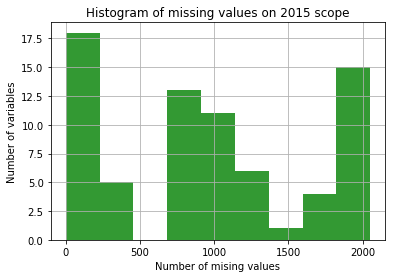

In [55]:
nb_missing_per_var_2015 = np.sum(cdv.loc[cdv["ANNEEFUZ"]==2015].isnull()) 
fig=plt.figure()
plt.title("Histogram of missing values on 2015 scope")
plt.ylabel(u'Number of variables')
plt.xlabel("Number of mising values")
bins = np.linspace(0, 2050,10)
plt.hist(nb_missing_per_var_2015[scope_2015 - complete_2015], 
         bins, facecolor='g', alpha=0.8)
plt.grid()

In [56]:
nb_missing_per_var_2015[scope_2015 - complete_2015].sort_values(ascending=False)

SEXE_9      2043
LIEN_9      2043
AGE_9       2043
AGE_8       2040
SEXE_8      2040
LIEN_8      2040
LIEN_7      2038
AGE_7       2038
SEXE_7      2038
LIEN_6      2014
AGE_6       2014
SEXE_6      2014
LIEN_5      1886
SEXE_5      1886
AGE_5       1886
REVAUTR     1715
SEXE_4      1601
AGE_4       1601
LIEN_4      1601
interim2    1405
PCSCONJ     1321
SALCOMPC    1321
LIEN_3      1289
SEXE_3      1289
AGE_3       1289
SALCOMPI    1236
TYPCONT     1089
TYPEMPL     1063
typcont2    1063
PRIVPUB     1063
            ... 
RE_MEDI      794
RE_TABAL     794
RE_WEB       794
RE_LOG       794
REVCONJ      737
ACTCONJ      737
NBENF        687
REVAUON      400
SEXE_2       400
LIEN_2       400
AGE_2        400
PROGRAD      303
zau1999      105
statut99     105
zau2010      103
RURAURBA      93
REVsqt        63
REVUC         63
REVTOT        57
NOT_PROF      25
SENSIENV      24
NOT_AMIS      23
NOT_COHE      23
NOT_POLI      20
NOT_LIBR      19
NOT_FAMI      11
SITUFAM        9
NBPIECES      

In [57]:
print("List of variable with more than 75% missing values in 2015:\n")
l = nb_missing_per_var_2015[scope_2015 - 
                            complete_2015][nb_missing_per_var_2015 > 
                                           0.75*2045]
print(" ".join(l.index))

List of variable with more than 75% missing values in 2015:

LIEN_4 SEXE_8 LIEN_9 LIEN_7 SEXE_6 REVAUTR SEXE_9 AGE_8 AGE_9 SEXE_5 SEXE_4 LIEN_6 AGE_7 AGE_4 SEXE_7 AGE_6 AGE_5 LIEN_8 LIEN_5


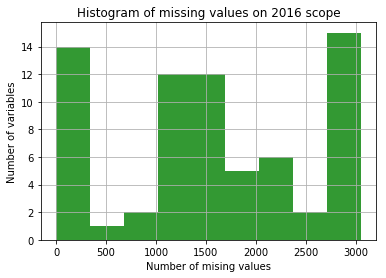

In [58]:
nb_missing_per_var_2016 = np.sum(cdv.loc[cdv["ANNEEFUZ"]==2016].isnull()) 
fig=plt.figure()
plt.title("Histogram of missing values on 2016 scope")
plt.ylabel(u'Number of variables')
plt.xlabel("Number of mising values")
bins = np.linspace(0, 3050,10)
plt.hist(nb_missing_per_var_2016[scope_2016 - complete_2016], 
         bins, facecolor='g', alpha=0.8)
plt.grid()

In [59]:
nb_missing_per_var_2016[scope_2016 
                        - complete_2016].sort_values(ascending=False)

SEXE_9      3048
AGE_9       3047
LIEN_9      3047
SEXE_8      3045
AGE_8       3044
LIEN_8      3044
SEXE_7      3040
AGE_7       3039
LIEN_7      3038
SEXE_6      3010
AGE_6       2999
LIEN_6      2996
SEXE_5      2881
LIEN_5      2809
AGE_5       2807
SEXE_4      2630
SEXE_3      2388
AGE_4       2355
LIEN_4      2348
REVAUTR     2164
interim2    2120
PCSCONJ     2079
SALCOMPC    2079
AGE_3       1901
LIEN_3      1891
SALCOMPI    1884
SEXE_2      1804
TYPCONT     1737
TYPEMPL     1677
typcont2    1677
            ... 
REVCONJ     1376
ACTCONJ     1340
RE_ENF      1241
RE_EQUI     1241
RE_TABAL    1241
RE_VOIT     1241
RE_WEB      1241
RE_VAC      1241
RE_LOG      1241
RE_ALIM     1241
RE_HABI     1241
RE_MEDI     1241
NBENF       1178
AGE_2        809
LIEN_2       726
PROGRAD      497
inseel        95
REVsqt        74
REVTOT        74
REVUC         74
NOT_PROF      35
NOT_COHE      34
NOT_FAMI      33
NOT_AMIS      32
NOT_POLI      32
NOT_LIBR      29
PRATCOLL      27
zau2010       

In [60]:
print("List of variable with more than 75% missing values in 2016:\n")
l = nb_missing_per_var_2016[scope_2016 - 
                            complete_2016][nb_missing_per_var_2016 > 
                                           0.75*3050]
print(" ".join(l.index))

List of variable with more than 75% missing values in 2016:

LIEN_4 SEXE_8 LIEN_9 LIEN_7 SEXE_6 SEXE_9 AGE_8 AGE_9 SEXE_5 SEXE_4 LIEN_6 AGE_7 AGE_4 SEXE_7 AGE_6 AGE_5 LIEN_8 LIEN_5 SEXE_3


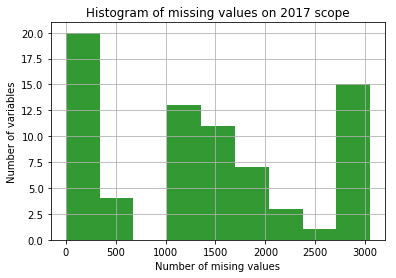

In [61]:
nb_missing_per_var_2017 = np.sum(cdv.loc[cdv["ANNEEFUZ"]==2017].isnull()) 
fig=plt.figure()
plt.title("Histogram of missing values on 2017 scope")
plt.ylabel(u'Number of variables')
plt.xlabel("Number of mising values")
bins = np.linspace(0, 3050,10)
plt.hist(nb_missing_per_var_2017[scope_2017 - complete_2017], 
         bins, facecolor='g', alpha=0.8)
plt.grid()

In [62]:
nb_missing_per_var_2017[scope_2017 
                        - complete_2017].sort_values(ascending=False)

LIEN_9      3018
SEXE_9      3018
AGE_9       3018
AGE_8       3013
LIEN_8      3013
SEXE_8      3013
AGE_7       2999
LIEN_7      2999
SEXE_7      2999
AGE_6       2946
LIEN_6      2946
SEXE_6      2946
LIEN_5      2775
SEXE_5      2775
AGE_5       2775
REVAUTR     2518
LIEN_4      2278
AGE_4       2278
SEXE_4      2278
interim2    1967
SALCOMPC    1920
PCSCONJ     1920
SALCOMPI    1869
AGE_3       1715
SEXE_3      1715
LIEN_3      1715
TYPCONT     1590
PRIVPUB     1523
TYPEMPL     1523
typcont2    1523
            ... 
RE_VOIT     1327
RE_WEB      1327
RE_MEDI     1327
REVCONJ     1232
ACTCONJ     1203
NBENF       1063
AGE_2        578
SEXE_2       578
LIEN_2       578
PROGRAD      435
inseel       119
REVUC        105
REVTOT       105
REVsqt       105
NOT_PROF      55
NOT_LIBR      52
NOT_POLI      47
NOT_CAD       44
NOT_LOG       43
NOT_FAMI      39
NOT_COHE      39
NOT_AMIS      37
popinter      24
poppeud       24
DEPCOM        24
popdense      24
typodeg       24
poptrpeu      

In [63]:
print("List of variable with more than 75% missing values in 2017:\n")
l = nb_missing_per_var_2017[scope_2017 - 
                            complete_2017][nb_missing_per_var_2017 > 
                                           0.75*3050]
print(" ".join(l.index))

List of variable with more than 75% missing values in 2017:

SEXE_8 LIEN_9 LIEN_7 SEXE_6 REVAUTR SEXE_9 AGE_8 AGE_9 SEXE_5 LIEN_6 AGE_7 SEXE_7 AGE_6 AGE_5 LIEN_8 LIEN_5


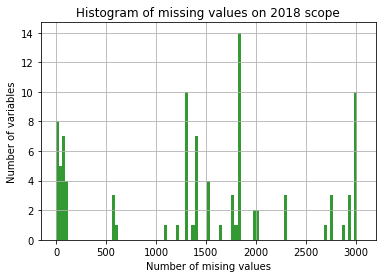

In [64]:
nb_missing_per_var_2018 = np.sum(cdv.loc[cdv["ANNEEFUZ"]==2018].isnull()) 
fig=plt.figure()
plt.title("Histogram of missing values on 2018 scope")
plt.ylabel(u'Number of variables')
plt.xlabel("Number of mising values")
bins = np.linspace(0, 3050,100)
plt.hist(nb_missing_per_var_2018[scope_2018 - complete_2018], 
         bins, facecolor='g', alpha=0.8)
plt.grid()

In [65]:
nb_missing_per_var_2018[scope_2018 
                        - complete_2018].sort_values(ascending=False)

LIEN_9      3015
SEXE_9      3015
AGE_9       3015
prescaf     3015
LIEN_8      3009
AGE_8       3009
SEXE_8      3009
LIEN_7      3001
AGE_7       3001
SEXE_7      3001
LIEN_6      2950
AGE_6       2950
SEXE_6      2950
AUTREAL     2880
SEXE_5      2758
LIEN_5      2758
AGE_5       2758
REVAUTR     2704
LIEN_4      2291
AGE_4       2291
SEXE_4      2291
RADIQUOI    2031
interim2    2006
PCSCONJ     1975
SALCOMPC    1975
RADWHY3     1844
RADWHY1     1844
RADWHY8     1844
RADWHY13    1844
RADWHY12    1844
            ... 
ACTCONJ     1219
NBENF       1096
PROGRAD      608
AGE_2        573
SEXE_2       573
LIEN_2       573
med          117
REVUC        105
REVTOT       105
REVsqt       105
NOT_POLI      85
UDA5          85
NOT_COHE      81
NOT_LIBR      71
NOT_PROF      70
NOT_CAD       67
NOT_AMIS      65
NOT_LOG       61
ASSOAUTR      59
SENSIENV      54
NOT_FAMI      50
PCSCON7       47
poptrpeu      15
popinter      15
typodeg       15
popdense      15
DEPCOM        15
poppeud       

In [66]:
print("List of variable with more than 75% missing values in 2017:\n")
l = nb_missing_per_var_2018[scope_2018 -
                            complete_2018][nb_missing_per_var_2018 > 
                                           0.75*3050]
print(" ".join(l.index))

List of variable with more than 75% missing values in 2017:

LIEN_4 REVAUTR SEXE_4 AGE_4 AGE_5 LIEN_9 AGE_8 AUTREAL SEXE_5 SEXE_6 SEXE_9 LIEN_6 AGE_6 LIEN_5 SEXE_8 LIEN_7 AGE_9 AGE_7 prescaf SEXE_7 LIEN_8


## 2) Selection and classification of features  

### a) Variable to be predicted - "HEUREUX"

In [67]:
cdv['HEUREUX'].value_counts().sort_values(ascending = False)

Assez souvent        5423
Occasionnellement    3665
Très souvent         1758
Jamais                203
[Nsp]                  82
Name: HEUREUX, dtype: int64

### b) Variable common to all years 

In [68]:
common_variables = (scope_2015 & scope_2016 & scope_2017 & scope_2018)
len(common_variables)

268

In [69]:
cdv_restricted_common = cdv.loc[:,common_variables]

In [70]:
l = list(common_variables)
l.sort()
print("List of variable common to all years")
print(l)

List of variable common to all years
['ACM1', 'ACM10', 'ACM11', 'ACM12', 'ACM2', 'ACM3', 'ACM4', 'ACM5', 'ACM6', 'ACM7', 'ACM8', 'ACM9', 'ACTCONJ', 'ADOPTGAY', 'AGE', 'AGE5', 'AGEDIP2', 'AGESEX12', 'AGE_2', 'AGE_3', 'AGE_4', 'AGE_5', 'AGE_6', 'AGE_7', 'AGE_8', 'AGE_9', 'AGGLO5', 'AGGLO9', 'AIDESUFF', 'ANNEEFUZ', 'ANNEFUZ2', 'ASSO10_2', 'ASSO10_3', 'ASSO11_2', 'ASSO11_3', 'ASSO6_2', 'ASSOAUTR', 'ASSOCONF', 'ASSOCONS', 'ASSOCULT', 'ASSOENVI', 'ASSOHUMA', 'ASSOJEUN', 'ASSOPARE', 'ASSOPOLI', 'ASSOSPOR', 'ASSOSYND', 'AUTREREV', 'BANQEPA', 'BANQMOB', 'BANQVIE', 'CADVIE', 'CADVIE3', 'CDV5', 'CDV5_4', 'CHAMP', 'CHERCHEM', 'CHOAVANT', 'CHOIXNUC', 'CHOVOLON', 'CLASSESO', 'COLLECTE', 'COMINSEE', 'CONDUIT', 'CONFASSO', 'CONFENTR', 'CONFGOUV', 'CONFPOLI', 'CONFPUB', 'DEPLOG', 'DEPLOG3', 'DIPL4', 'DIPLOME', 'DPT', 'ECHPOL', 'EFFORTPP', 'EMP7', 'ENFANTS', 'ETATSAN', 'EXERCPRO', 'FAMILLE', 'FREQBIBL', 'FREQCINE', 'FREQSPOR', 'FREQTELE', 'HANDICAP', 'HEUREUX', 'INNOVTEC', 'INQ4SUR6', 'INQAGRE3', 'INQAG

### c) variable analysis - link with CDV study 

In [71]:
print(list(cdv.columns))

['INTER6', 'INTER', 'ANNEEFUZ', 'ANNEFUZ2', 'COLLECTE', 'CHAMP', 'POND', 'identifiant', 'SEXE', 'AGE5', 'PCSENQ8', 'TYPOSQT', 'DIPL4', 'AGGLO5', 'UDA10', 'SITUEMP3', 'AGEDIP2', 'DPT', 'COMINSEE', 'AGGLO9', 'AGE', 'DIPLOME', 'EXERCPRO', 'SITUEMP', 'SITUEMP5', 'SITUEMP6', 'SALCOMP', 'TYPEMPL', 'INTERIM', 'TYPCONT', 'TEMPSTRA', 'nbheures', 'NBHEUR39', 'NBHEUR35', 'PREFPALI', 'SALCOMPI', 'CHERCHEM', 'IMAGTRAV', 'COUPLE', 'STATMAT', 'STATMAT4', 'ACTCONJ', 'SALCOMPC', 'ENFANTS', 'NBENF', 'NBENF6', 'FAMILLE', 'UNIONGAY', 'ADOPTGAY', 'TRAVFEM', 'NB0003', 'NB0306', 'NB0610', 'NB1016', 'NB1620', 'NB2099', 'NB03_4', 'NB06_4', 'NB10_4', 'NB16_4', 'NB20_4', 'NB99_4', 'NB03_2', 'NB06_2', 'NB10_2', 'NB16_2', 'NB20_2', 'NB99_2', 'SITUFAM', 'RESIDALT', 'NBPIECES', 'NBPIECE6', 'LOGSUFFI', 'STATLOGB', 'STATLOG4', 'DEPLOG', 'DEPLOG3', 'CADVIE', 'CADVIE3', 'SECURITE', 'SECUR3', 'MODCHAUF', 'TYPCHAUF', 'VOITURE', 'CONDUIT', 'CHOIXNUC', 'SENSIENV', 'TAXENV', 'HANDICAP', 'SOUFFTET', 'SOUFFDOS', 'SOUFFNER', 'S

In [72]:
cdv.loc[:,["POND","INTER6",
           "INTER","COLLECTE",
           "CHAMP","identifiant"]].head()

,POND,INTER6,INTER,COLLECTE,CHAMP,identifiant
0,1.313554,373001,3001,Online,18 ans et + métropole,NaN
1,2.009015,373002,3002,Online,18 ans et + métropole,NaN
2,0.217607,373003,3003,Online,18 ans et + métropole,NaN
3,0.539351,373004,3004,Online,18 ans et + métropole,NaN
4,0.270204,373005,3005,Online,18 ans et + métropole,NaN


In [73]:
cdv["CHAMP"].unique()

array(['18 ans et + métropole', '15-17 ans + DOM + Corse'], dtype=object)

In [74]:
cdv["COLLECTE"].unique()

array(['Online'], dtype=object)

In [75]:
# Variables not present in the list ???
cdv["RURAURBA"].unique()

array(['PR', 'PU', nan, 'IN'], dtype=object)

In [76]:
cdv["AGGLOINS"].unique()

array([ nan,   0.,   2.,   1.,   7.,   4.,   8.,   5.,   3.,   6.])

In [77]:
# List of variable explained in the exceel file provided
liste_explained = {"INTER6","ANNEEFUZ","ANNEEFUZ2","COLLECTE","SEXE",
                   "AGE5","PCSENQ8","TYPOSQT",
                   "DIPL4","AGGLO5","UDA10","SITUEMP3","AGGLO9","AGE",
                   "EXERCPRO","SITUEMP","SITUEMP5",
                   "SITUEMP6","SALCOMP","INTERIM","TYPCONT","TEMPSTRA",
                   "nbheures","NBHEUR39",
                   "NBHEUR35","PREFPALI","SALCOMPI","CHERCHEM","NBCHOM",
                   "STATMAT","ACTCONJ","SALCOMPC",
                   "ENFANTS","NBENF","NBENF6","DIPLOME","FAMILLE",
                   "UNIONGAY","ADOPTGAY","TRAVFEM","NB0003","NB0306",
                   "NB0610","NB1016",
                   "NB1620","NB2099","NBPIECE6","LOGSUFFI","DEPLOG",
                   "DEPLOG3","CADVIE","CADVIE3","SECUR3",
                   "MODCHAUF","TYPCHAUF","TELFIXE","TELMOB","SENSIENV",
                   "TAXENV","HANDICAP","SOUFFTET","SOUFFDOS",
                   "SOUFFNER","SOUFFDEP","SOUFFINS","ETATSAN","NBPERS",
                   "NBPERS5","SEXE_2","SEXE_3",
                   "SEXE_4","SEXE_5","SEXE_6","SEXE_7","SEXE_8","SEXE_9",
                   "AGE_2","AGE_3",
                   "AGE_4","AGE_5","AGE_6","AGE_7","AGE_8","AGE_9",
                   "LIEN_2","LIEN_3","LIEN_4","LIEN_5","LIEN_6",
                   "LIEN_7","LIEN_8","LIEN_9","RESTRICT","NIVPERSO",
                   "NIVFRAN","NIVFRAN4","CDV5","BANQEPA",
                   "BANQVIE","ASSOSPOR","ASSOCULT","ASSOCONF",
                   "ASSOJEUN","ASSOSYND","ASSOENVI",
                   "ASSOPARE","ASSOCONS","ASSOPOLI","ASSOHUMA",
                   "ASSOAUTR","FREQSPOR",
                   "FREQTELE","RAISPAUV","CHOAVANT","CHOVOLON",
                   "OPIRSA","JUSTICE","TRANSFST","PREOCCU1",
                   "PREOCCU2","INQAGRE3","INQALIM","CLASSESO",
                   "HEUREUX","CONFGOUV","revtot7",
                   "NBUC","TYPLOG2","TYPLOG3","AGESEX12",
                   "PCSENQ36","UDA14","zau1999","POND","dpt"}

In [78]:
print(f"Number of variable explained in the exceel file \
... :{len(liste_explained)}")

Number of variable explained in the exceel file :135


In [79]:
columns = set(cdv.columns)

In [80]:
print(f"Variables explained but not present in the dataset :\
{len(liste_explained - columns)}\n")
print(" ".join(liste_explained - columns))

Variables explained but not present in the dataset :4

dpt TELFIXE TYPLOG3 ANNEEFUZ2


In [81]:
print(f"Variables present in the dataset but not explained :\
{len(columns - liste_explained)}\n")
print(" ".join(columns - liste_explained))

Variables present in the dataset but not explained :223

RADWHY8 PCSENQ32 decsqt PCSENQ24 identifiant inseel RADWHY13 REVTOT6 RADI3 RE_VOIT REVAUTR PREOPAUF COMMU4 ACM12 VISITFAM REVCONJ DPT interim2 CONDUIT UDA5 AIDESUFF NOT_FAMI CONFWEB ADNCB zau2010 COMMU8 REV_TR7 ACM11 RE_EQUI NOT_LIBR an_enq SITUFAM PREOIMMI INQROUT3 INQCHOM3 AGE6 CONFPUB NB20_4 RADWHY5 med CSP6 inseenum NB99_2 popinter NBPIECES STATMAT4 agedip INTER an_nais INQMALA3 ACM1 INQNUCL3 ASSO10_3 BANQMOB CHOIXNUC decuc PCSCONJ RELEG ACM8 PRESTCAF HARVEY RADI2 PCSCON7 INQ4SUR6 COMMU2 ROBOT1 ACM6 REVPF WHYLIM NB20_2 RADIQUOI AGEDIP2 PREOMALA INQROUTE CONFASSO REVAUON EMP7 EFFORTPP COMMU5 ROBOT3 statut99 PCSENQ9 YOGA CHAMP AUTREAL RESIDALT RE_ALIM COMMU1 NB16_2 PCSENQ15 PRATCOLL NIVPERS4 ACM5 PREODROG RADWHY6 ACM3 NB06_4 PREOPAUM RE_LOG ECHPOL INQAGRES type99 PREOTENS ADNSTIC popdense PROGRAD PREOCONF ACM10 ACM9 age_OW NB06_2 QUOTAAGE COMMU6 INQGUER3 NOT_LOG NOT_PROF COUPLE INQMALAD CP PREOENV COMMU3 FREQBIBL RADWHY10 REVTO

In [82]:
print(f"Variables present in the dataset for all years but not explained :\
{len(common_variables - liste_explained)}\n")
print(" ".join(common_variables - liste_explained))

Variables present in the dataset for all years but not explained :137

PCSENQ32 decsqt PCSENQ24 REVTOT6 RE_VOIT ACM12 REVAUTR PREOPAUF REVCONJ DPT interim2 CONDUIT AIDESUFF NOT_FAMI zau2010 REV_TR7 ACM11 RE_EQUI NOT_LIBR an_enq SITUFAM PREOIMMI INQROUT3 INQCHOM3 CONFPUB NB20_4 NB99_2 STATMAT4 NBPIECES INTER an_nais INQMALA3 ACM1 INQNUCL3 ASSO10_3 BANQMOB CHOIXNUC decuc PCSCONJ ACM8 PRESTCAF PCSCON7 INQ4SUR6 ACM6 REVPF NB20_2 AGEDIP2 PREOMALA INQROUTE CONFASSO EMP7 EFFORTPP statut99 PCSENQ9 CHAMP RE_ALIM NB16_2 PCSENQ15 NIVPERS4 ACM5 PREODROG ACM3 NB06_4 PREOPAUM RE_LOG ECHPOL INQAGRES PREOTENS PROGRAD PREOCONF ACM10 ACM9 NB06_2 INQGUER3 NOT_PROF INQMALAD PREOENV FREQBIBL REVTOT PCSENQ35 NB10_4 RE_VAC CONFENTR PREOVIO VOITURE PREOCHOM NOT_POLI RE_WEB PCSENQ7 CDV5_4 ASSO11_2 NB03_2 INQALIM3 RE_TABAL TYPEMPL NB99_4 FREQCINE ACM4 NOT_COHE PREOEURO TRANSFO5 VACANCES ASSO11_3 RE_ENF REVUC ASSO10_2 PCSENQ13 COMINSEE INQCHOMA INQGUERR NB16_4 ASSO6_2 PCSENQ10 TYPOCLAS INQNUCLE ACM2 OPIIMMIG STA

### d) bottom up...

Variable **inseel**, **com** & **DEPCOM**

In [83]:
# analysis of differences between inseel com & DEPCOM
df_tmp = cdv.loc[:,['inseel','com','DEPCOM']].dropna()

In [84]:
df_tmp.loc[df_tmp['inseel'] != df_tmp['com']].head(10)

,inseel,com,DEPCOM
8128,75056SR19,75119,75056
8132,69123SR03,69383,69123
8144,69123SR01,69381,69123
8157,69123SR03,69383,69123
8171,75056SR12,75112,75056
8175,69123SR07,69387,69123
8180,75056SR12,75112,75056
8181,75056SR18,75118,75056
8182,75056SR15,75115,75056
8217,75056SR16,75116,75056


In [85]:
df_tmp.loc[df_tmp['inseel']!= df_tmp['DEPCOM']].head(10)

,inseel,com,DEPCOM
8128,75056SR19,75119,75056
8132,69123SR03,69383,69123
8144,69123SR01,69381,69123
8157,69123SR03,69383,69123
8171,75056SR12,75112,75056
8175,69123SR07,69387,69123
8180,75056SR12,75112,75056
8181,75056SR18,75118,75056
8182,75056SR15,75115,75056
8217,75056SR16,75116,75056


In [86]:
cdv["REVENQ"].describe()

count     11131.000000
mean      71370.251101
std      253880.504617
min           0.000000
25%        1100.000000
50%        1800.000000
75%        2800.000000
max      999999.000000
Name: REVENQ, dtype: float64

In [87]:
cdv["AUTREREV"].describe()

count     11131.000000
mean     192360.568682
std      393925.875729
min           0.000000
25%           0.000000
50%           0.000000
75%        1000.000000
max      999999.000000
Name: AUTREREV, dtype: float64

In [88]:
cdv['REV_TR7'].value_counts()

De 1500 à 2300 €                    2332
De 2300 à 3100 €                    2281
4000 € et plus                      2087
3100 € à 4000 €                     1675
De 900 à 1500 €                     1544
Moins de 900 €                       862
Non déclaré (ne sait pas, refus)     350
Name: REV_TR7, dtype: int64

**N – THEMES GENERAUX***

In [89]:
# N1
cdv['JUSTICE'].value_counts()

Assez mal     5365
Assez bien    3080
Très mal      2379
Très bien      206
[Nsp]          101
Name: JUSTICE, dtype: int64

In [90]:
# N2 
cdv['RELEG'].value_counts()

Non, plutôt pas     1302
Oui, plutôt         1069
Oui, tout à fait     311
Non, pas du tout     290
[Nsp]                 44
Name: RELEG, dtype: int64

In [91]:
# N3 done
cdv['CONFPUB'].value_counts()

Plutôt confiance         6026
Plutôt pas confiance     3418
Pas du tout confiance    1030
Très confiance            503
[Nsp]                     154
Name: CONFPUB, dtype: int64

In [92]:
# N4 
cdv['TRANSFST'].value_counts()

Oui      9288
Non      1710
[Nsp]     133
Name: TRANSFST, dtype: int64

In [93]:
# N5
cdv['PROGRAD'].value_counts()

Changements radicaux     4988
Réformes progressives    4231
[Nsp]                      69
Name: PROGRAD, dtype: int64

In [94]:
# N6 only if N5 "Changements radicaux"
cdv.loc[cdv['RADIQUOI'].notnull(),'RADIQUOI'].head(20)

8116    Simplifier les papiers administratifs pour les...
8117    diminuer le nombre de fonctionnaires et mettre...
8120    Redevenons ce que nous avons !t! pendant des s...
8121                         revenir ! des valeurs saines
8124    ne pas attendre tout de l' !tat.,Arr!ter l' !t...
8127    Am!liorer le pouvoir d'achat, revoir la fiscal...
8128    lutter contre les in!galit!s sociales,les !car...
8129                                 la gestion de l'!tat
8130                                   tout est a changer
8132         les migrans doivent retourner dans leur payi
8134    lib!ralisation que l'!tat soit moins pr!sent, ...
8135                             requilibre de la fortune
8144           Limiter le pouvoir de la sph!re financi!re
8148                           code du travail, fiscalit!
8152                                                 Tout
8153    Punir les voyous beaucoup plus s!v!rement et r...
8157                  plus d'!galit! entre jeune et vieux
8159    D!velo

In [95]:
cdv_ssfmt.loc[cdv_ssfmt['RADIQUOI'].notnull(),'RADIQUOI'].head(20)

8116    Simplifier les papiers administratifs pour les...
8117    diminuer le nombre de fonctionnaires et mettre...
8120    Redevenons ce que nous avons !t! pendant des s...
8121                         revenir ! des valeurs saines
8124    ne pas attendre tout de l' !tat.,Arr!ter l' !t...
8127    Am!liorer le pouvoir d'achat, revoir la fiscal...
8128    lutter contre les in!galit!s sociales,les !car...
8129                                 la gestion de l'!tat
8130                                   tout est a changer
8132         les migrans doivent retourner dans leur payi
8134    lib!ralisation que l'!tat soit moins pr!sent, ...
8135                             requilibre de la fortune
8144           Limiter le pouvoir de la sph!re financi!re
8148                           code du travail, fiscalit!
8152                                                 Tout
8153    Punir les voyous beaucoup plus s!v!rement et r...
8157                  plus d'!galit! entre jeune et vieux
8159    D!velo

In [96]:
# N7
cdv['ORDLIB'].value_counts()

Un peu plus d'ordre         4711
Beaucoup plus d'ordre       3699
Un peu plus de liberté      1817
Beaucoup plus de liberté     739
[Nsp]                        165
Name: ORDLIB, dtype: int64

In [97]:
# N8
cdv['CONFMEFI'].value_counts()

On n'est jamais assez méfiant                    4931
Il est possible de faire confiance aux autres    4024
[Nsp]                                             131
Name: CONFMEFI, dtype: int64

In [98]:
# N9
cdv['PREOCCU1'].value_counts()

Le chômage                           2716
La violence et l'insécurité          1789
L'immigration                        1465
Les maladies graves                  1218
La pauvreté en France                1071
La dégradation de l'environnement    1063
Les tensions internationales          696
La pauvreté dans le monde             543
Les conflits sociaux                  178
La drogue                             158
L'Europe                              140
[Nsp, NR]                              94
Name: PREOCCU1, dtype: int64

In [99]:
cdv['PREOCCU2'].value_counts()

La violence et l'insécurité          2126
L'immigration                        1581
La pauvreté en France                1367
Le chômage                           1141
La dégradation de l'environnement    1119
Les tensions internationales          932
Les maladies graves                   849
La pauvreté dans le monde             801
Les conflits sociaux                  348
L'Europe                              343
La drogue                             278
[Nsp, NR]                             246
Name: PREOCCU2, dtype: int64

In [100]:
# N10 RADI1 – RADI2 – RADI3
cdv['RADI1'].value_counts()

Oui, je comprends           1691
Non, je ne comprends pas    1282
[Nsp]                         43
Name: RADI1, dtype: int64

In [101]:
cdv['RADI2'].value_counts()

Non, je ne comprends pas    2683
Oui, je comprends            284
[Nsp]                         49
Name: RADI2, dtype: int64

In [102]:
cdv['RADI3'].value_counts()

Non, je ne comprends pas    2609
Oui, je comprends            359
[Nsp]                         48
Name: RADI3, dtype: int64

In [103]:
# N11 OPICULT
cdv['OPICULT'].value_counts()

La diversité des cultures est une richesse                   4603
La diversité des cultures rend difficile la vie en commun    4250
[Nsp]                                                         233
Name: OPICULT, dtype: int64

In [104]:
# N12 COMMU1—COMMU8
cdv['COMMU1'].value_counts()

Non      2284
Oui       594
[Nsp]     138
Name: COMMU1, dtype: int64

In [105]:
cdv['COMMU2'].value_counts()

Non      2063
Oui       828
[Nsp]     125
Name: COMMU2, dtype: int64

In [106]:
# N13
cdv['MONDIAL'].value_counts()

Plutôt des inconvénients    4065
Plutôt des avantages        3874
[Nsp]                        142
Name: MONDIAL, dtype: int64

In [107]:
# N14 
# INQMALAD - INQAGRES - INQROUTE - 
# INQCHOMA - INQGUERR - INQNUCLE- INQALIM
cdv['INQMALAD'].value_counts()

Beaucoup       4516
Assez          4100
Un peu         1861
Pas du tout     508
[Nsp]           146
Name: INQMALAD, dtype: int64

In [108]:
cdv['INQAGRES'].value_counts()

Assez          3600
Un peu         3409
Beaucoup       2475
Pas du tout    1446
[Nsp]           201
Name: INQAGRES, dtype: int64

In [109]:
# N15
cdv['CLASSESO'].value_counts()

La classe moyenne inférieure    4693
La classe moyenne supérieure    2880
La classe populaire             2036
Les défavorisés                  681
Les gens aisés                   560
Les privilégiés                  171
[Nsp]                            110
Name: CLASSESO, dtype: int64

In [110]:
# N16 
cdv['ISEGO'].value_counts()

Assez souvent    2590
Rarement         2129
Très souvent      871
Jamais            356
[Nsp]              90
Name: ISEGO, dtype: int64

In [111]:
# N19 CONFGOUV
cdv['CONFGOUV'].value_counts()

Pas du tout confiance    4069
Plutôt pas confiance     3625
Plutôt confiance         2882
Tout à fait confiance     430
[Nsp]                     125
Name: CONFGOUV, dtype: int64

In [112]:
# N20 ECHPOL
cdv['ECHPOL'].value_counts()

Au centre          2967
Plutôt à gauche    1803
Plutôt à droite    1663
A gauche           1418
À droite           1202
Très à droite      1040
[Nsp, NR]           542
Très à gauche       496
Name: ECHPOL, dtype: int64

In [113]:
cdv_ssfmt['ECHPOL'].value_counts()

4    2967
3    1803
5    1663
2    1418
6    1202
7    1040
8     542
1     496
Name: ECHPOL, dtype: int64

In [114]:
cdv_ssfmt['NB0003'].value_counts()

0    10527
1      552
2       49
3        2
4        1
Name: NB0003, dtype: int64

In [115]:
cdv_ssfmt['NB0610'].value_counts()

0    10185
1      814
2      126
3        6
Name: NB0610, dtype: int64

In [116]:
obj_df = cdv.select_dtypes(include=['object']).copy()

In [117]:
# INTER6 index candidate

In [118]:
np.sum(cdv["INTER6"].isnull())

0

In [119]:
len(cdv["INTER6"].unique()) == cdv.shape[0]

True

In [120]:
tech_var = {"ANNEEFUZ", "ANNEFUZ2", "COLLECTE", "CHAMP", 
            "identifiant", "an_enq", "INTER"}
cdv.loc[:,tech_var].dropna().head()

,COLLECTE,CHAMP,identifiant,ANNEEFUZ,INTER,an_enq,ANNEFUZ2
8115,Online,18 ans et + métropole,0a22333,2018,1,2018,2018
8116,Online,18 ans et + métropole,0a26329,2018,2,2018,2018
8117,Online,18 ans et + métropole,0a26791,2018,3,2018,2018
8118,Online,18 ans et + métropole,0a27001,2018,4,2018,2018
8119,Online,18 ans et + métropole,0a27217,2018,5,2018,2018


In [121]:
com_var = {'COMINSEE', 'DEPCOM', 'com', 'inseel','inseenum','CP'}
cdv.loc[:,tech_var].dropna().head()

,COLLECTE,CHAMP,identifiant,ANNEEFUZ,INTER,an_enq,ANNEFUZ2
8115,Online,18 ans et + métropole,0a22333,2018,1,2018,2018
8116,Online,18 ans et + métropole,0a26329,2018,2,2018,2018
8117,Online,18 ans et + métropole,0a26791,2018,3,2018,2018
8118,Online,18 ans et + métropole,0a27001,2018,4,2018,2018
8119,Online,18 ans et + métropole,0a27217,2018,5,2018,2018


In [122]:
bizz_var = {'NB0003','NB0306','NB0610','NB1016','NB1620','NB2099',
            'an_nais','decuc','decsqt','info','typodeg','refus2', 
            'cpt', 'prescaf', 'poptrpeu','REVUC','i','REVTOT', 
            'poppeud','popdense', 'popinter', 'pmun', 'agedip', 'age_OW',
            'REVsqt', 'NBUC', 'AGGLOINS', 'med', 'CSP6','REVTOT6'}
cdv.loc[:,bizz_var].dropna().head()

,NB1016,decsqt,REVTOT,AGGLOINS,NBUC,REVTOT6,cpt,NB1620,i,info,...,poppeud,age_OW,agedip,NB0003,an_nais,NB2099,decuc,REVUC,pmun,typodeg
10457,0,Décile 4,1919.0,2.0,1.5,3,0.0,0,6.0,revtranc seul,...,0.04195,4.0,21.0,0,1960,0,Décile 4,1279.333333,2017.0,2.0


In [123]:
cdv.loc[:,'RADIQUOI'].dropna().head()

8116    Simplifier les papiers administratifs pour les...
8117    diminuer le nombre de fonctionnaires et mettre...
8120    Redevenons ce que nous avons !t! pendant des s...
8121                         revenir ! des valeurs saines
8124    ne pas attendre tout de l' !tat.,Arr!ter l' !t...
Name: RADIQUOI, dtype: object

#### Type 'object' in cdv file

In [124]:
obj_cdv = cdv.select_dtypes(include=['object'])
obj_var = set(obj_cdv.columns)
print(f"{len(obj_var)} variables having 'object' type in 'cdv.csv'")
cat_max9_var = set()
cat_min10_var = set()
for c in obj_var:
    obj_cdv_valcpt = obj_cdv[c].value_counts()
    print(f"*****{c}*****")
    print(obj_cdv_valcpt)
    print("------------------\n")
    if len(obj_cdv_valcpt) > 10:
        cat_min10_var.add(c)
    else:
        cat_max9_var.add(c)

292 variables having 'object' type in 'cdv.csv'
*****LIEN_4*****
Enfant, beau-fils, belle-fille    1807
Frère, soeur                       497
Parent, beau-parent                163
6                                   55
Autre                               50
Conjoint ou compagnon               29
7                                   12
Name: LIEN_4, dtype: int64
------------------

*****RADWHY8*****
0                                                                   1055
Moins d'immigration, il faut renvoyer tous les immigrés chez eux     117
Name: RADWHY8, dtype: int64
------------------

*****revtot7*****
De 1500 à 2300 €                    2333
De 2300 à 3100 €                    2272
4000 € et plus                      2096
3100 € à 4000 €                     1681
De 900 à 1500 €                     1547
Moins de 900 €                       861
Non déclaré (ne sait pas, refus)     341
Name: revtot7, dtype: int64
------------------

*****decsqt*****
Décile 7         1289
Décile 3   


*****VISITFAM*****
Oui      6550
Non      1459
[Nsp]      72
Name: VISITFAM, dtype: int64
------------------

*****OPIRSA*****
Cela risque d'inciter les gens à s'en contenter    6278
Cela leur donnera le coup de pouce nécessaire      4609
[Nsp]                                               244
Name: OPIRSA, dtype: int64
------------------

*****BANQVIE*****
Oui      5552
Non      5410
[Nsp]     169
Name: BANQVIE, dtype: int64
------------------

*****DPT*****
59    491
75    482
69    399
33    304
13    287
78    255
44    251
92    248
97    239
31    238
77    237
62    224
94    222
83    206
35    200
29    200
76    197
34    190
91    188
57    185
38    185
67    182
95    180
93    176
06    169
54    150
49    148
42    146
45    130
14    128
     ... 
10     57
36     55
79     54
04     52
47     50
70     48
53     44
39     44
16     39
82     39
08     37
61     35
55     35
58     35
19     33
12     32
65     31
52     31
32     30
09     24
90     23
46     23
43   

------------------

*****RADI2*****
Non, je ne comprends pas    2683
Oui, je comprends            284
[Nsp]                         49
Name: RADI2, dtype: int64
------------------

*****PCSENQ8*****
Retraité                                                      2968
Employé                                                       1909
Profession Intermédiaire                                      1570
Ouvrier                                                       1379
Autre inactif                                                 1237
Cadre et profession intellectuelle supérieure                 1011
Personne au foyer                                              595
Agri. exploitant, artisan, commerçant et chef d'entreprise     462
Name: PCSENQ8, dtype: int64
------------------

*****PCSCON7*****
Sans conjoint                                                 4532
Conjoint inactif                                              2770
Cadre, prof. intellectuelle sup., profession intermédiaire    168

In [125]:
ord_var = {
    "CONFPOLI", "AGE5","SECURITE", "ACM7","INQGUERR", "NBPIECE6","INNOVTEC",
    "JUSTICE","EFFORTPP","ACM10","NIVFRAN4","NBPERS5","INQCHOMA","CDV5_4",
    "CONFGOUV","ADOPTGAY","ACM8","FREQCINE","CONFPUB","FREQSPOR","INQALIM",
    "ASSO10_3", "FREQBIBL","DEPLOG","NBCHOM","CONFENTR","ORDLIB","ACM5",
    "INQMALAD","FREQTELE","NBENF6","ACM9","revtot7","INQROUTE","NIVPERS4",
    "ETATSAN","INQNUCLE","NIVPERSO","CONFASSO","ACM6","CDV5","UNIONGAY",
    "ACM4","INQAGRES","CADVIE","NIVFRAN","REV_TR7","ISEGO","RECEP","AGE6",
    "ADNCB","PRATCOLL","NBHEUR39","HARVEY","QUOTAAGE","NBHEUR35","RELEG",
    "CONFKEUF","CONFECOL","ADNSTIC","ADNORDI","CONFPRES","CONFWEB","CONFBANK"
}

In [126]:
# review
for c in ord_var:
    print(f'\n-------{c}----------')
    print(cdv[c].value_counts())


-------NBHEUR35----------
35 heures             1805
36 à 39 heures        1407
Moins de 35 heures    1117
40 à 45 heures         992
46 heures et plus      428
[Nsp]                  140
Name: NBHEUR35, dtype: int64

-------AGE5----------
40 à 59 ans        3945
25 à 39 ans        2203
70 ans et plus     1732
Moins de 25 ans    1686
60 à 69 ans        1565
Name: AGE5, dtype: int64

-------ACM6----------
Niveau de vie Français : un peu moins bien      4766
Niveau de vie Français : beaucoup moins bien    2986
Niveau de vie Français : pareil                 2331
Niveau de vie Français : mieux                   875
[Nsp]                                            173
Name: ACM6, dtype: int64

-------revtot7----------
De 1500 à 2300 €                    2333
De 2300 à 3100 €                    2272
4000 € et plus                      2096
3100 € à 4000 €                     1681
De 900 à 1500 €                     1547
Moins de 900 €                       861
Non déclaré (ne sait pas, ref

Doubtfull ... classified as categorial  

***TYPOCLAS***  
Classes moyennes inférieures    3420
Catégories modestes             2130
Classes moyennes supérieures    1884
Catégories pauvres              1147
Catégories aisées               1133
Hauts revenus                   1070
Non réponse                      347
Name: TYPOCLAS, dtype: int64  
  
***CLASSESO***  
La classe moyenne inférieure    4693
La classe moyenne supérieure    2880
La classe populaire             2036
Les défavorisés                  681
Les gens aisés                   560
Les privilégiés                  171
[Nsp]                            110
Name: CLASSESO, dtype: int64  

***ASSO11_3***  
Aucune          5352
Une             3127
Deux ou plus    2652
Name: ASSO11_3, dtype: int64   
  
***NB10_4***
Aucun enfant de moins de 10 ans             9453
Un enfant de moins de 10 ans                1015
Deux enfants de moins de 10 ans              549
Trois et plus enfants de moins de 10 ans     114
Name: NB10_4, dtype: int64  

***NB20_4***  
Aucun enfant de moins de 20 ans             8147
Un enfant de moins de 20 ans                1336
Deux enfants de moins de 20 ans             1190
Trois et plus enfants de moins de 20 ans     458
Name: NB20_4, dtype: int64  

***NB06_4***  
Aucun enfant de moins de 6 ans             10046
Un enfant de moins de 6 ans                  811
Deux enfants de moins de 6 ans               251
Trois et plus enfants de moins de 6 ans       23
Name: NB06_4, dtype: int64  

***NB99_4***  
Aucun enfant de 20 ans et plus             7543
Un enfant de 20 ans et plus                1579
Deux enfants de 20 ans et plus             1409
Trois et plus enfants de 20 ans et plus     600
Name: NB99_4, dtype: int64  

***YOGA***  
Jamais                              2128
Plus rarement                        408
En moyenne, une fois par semaine     228
En moyenne, une fois par mois        139
Tous les jours ou presque             73
[Nsp]                                 40
Name: YOGA, dtype: int64

In [127]:
# exclusion of features with order
cat_var = obj_var - ord_var
cat_max9_var = cat_max9_var - ord_var
cat_min10_var = cat_min10_var - ord_var

In [128]:
scope = cat_min10_var - com_var - tech_var - bizz_var
cdv.loc[:,scope].dropna().head()

,PREOCCU2,PCSENQ32,PCSENQ24,PCSENQ36,PCSENQ35,PCSCONJ,RADIQUOI,UDA23,AGEDIP2,UDA14,AGESEX12,PCSENQ13,PCSENQ15,PREOCCU1,MODCHAUF,DPT
8148,La drogue,Cadre administratif et commercial d'entreprise,Cadre d'entreprise,Cadre administratif et commercial d'entreprise,Cadre administratif et commercial d'entreprise,Cadre administratif et commercial d'entreprise,"code du travail, fiscalit!",Rhône-Alpes,20-29 ans diplôme bac et +,Auvergne - Rhône Alpes,"20-29 ans, femme","Profession libérale, cadre supérieur",Cadre supérieur,Les conflits sociaux,Électricité,69
8152,La violence et l'insécurité,"Personnes au foyer, a.inac.",Inactif divers (autre que retraité),Personne au foyer,Personne au foyer et autre inactif,Artisan,Tout,Pays de la Loire,30-49 ans diplôme bac et +,Pays de la Loire,"30-49 ans, femme",Personne au foyer,Personne au foyer,La pauvreté en France,Gaz naturel (gaz de réseau),44
8182,La violence et l'insécurité,Ingénieur et cadre technique d'entreprise,Cadre d'entreprise,Ingénieur et cadre technique d'entreprise,Ingénieur et cadre technique d'entreprise,"Professeur, profession scientifique",Revoir le syst!me des aides par exemple. R!dui...,Ile de France,30-49 ans diplôme bac et +,Ile de France,"30-49 ans, homme","Profession libérale, cadre supérieur",Cadre supérieur,La pauvreté dans le monde,Gaz naturel (gaz de réseau),75
8186,La violence et l'insécurité,Ouvrier non qualifié,Ouvrier non qualifié,Ouvrier non qualifié,Ouvrier non qualifié,Personnel des services directs aux particuliers,LES IMMIGRANTS,Rhône-Alpes,30-49 ans diplôme inférieur au bac,Auvergne - Rhône Alpes,"30-49 ans, homme",Ouvrier,Ouvrier,L'immigration,Bois,69
8192,La dégradation de l'environnement,"Personnes au foyer, a.inac.",Inactif divers (autre que retraité),Personne au foyer,Personne au foyer et autre inactif,Ingénieur et cadre technique d'entreprise,moins de paperasses,Ile de France,50-59 ans diplôme bac et +,Ile de France,"50-59 ans, femme",Personne au foyer,Personne au foyer,Les maladies graves,Gaz naturel (gaz de réseau),78


In [129]:
cdv_dtypes = cdv.dtypes
cdv_dtypes.value_counts()

object     292
float64     47
int64       15
dtype: int64

In [130]:
int_var = set(cdv_dtypes[cdv_dtypes == 'int64'].index)
scope = int_var - ( tech_var | com_var | bizz_var)
cdv.loc[:,scope].dropna().head()

,INTER6,AGE,REVENQ,AUTREREV
0,373001,56,1100,0
1,373002,64,2000,0
2,373003,71,5000,0
3,373004,21,200,0
4,373005,70,998,0


In [131]:
cdv["REVTOT6"].value_counts()

5    3777
3    2333
4    2272
2    1547
1     861
6     341
Name: REVTOT6, dtype: int64

In [132]:
cdv["NB2099"].value_counts()

0    10210
1      733
2      166
3       19
4        3
Name: NB2099, dtype: int64

In [133]:
float_var = set(cdv_dtypes[cdv_dtypes == 'float64'].index)
float_var

{'AGE_2',
 'AGE_3',
 'AGE_4',
 'AGE_5',
 'AGE_6',
 'AGE_7',
 'AGE_8',
 'AGE_9',
 'AGGLOINS',
 'CP',
 'CSP6',
 'NBENF',
 'NBPERS',
 'NBPIECES',
 'NBUC',
 'NOT_AMIS',
 'NOT_CAD',
 'NOT_COHE',
 'NOT_FAMI',
 'NOT_LIBR',
 'NOT_LOG',
 'NOT_POLI',
 'NOT_PROF',
 'POND',
 'REVAUTR',
 'REVCONJ',
 'REVPF',
 'REVTOT',
 'REVUC',
 'REVsqt',
 'SENSIENV',
 'TYPLOG',
 'age_OW',
 'agedip',
 'cpt',
 'i',
 'inseenum',
 'med',
 'nbheures',
 'pmun',
 'popdense',
 'popinter',
 'poppeud',
 'poptrpeu',
 'prescaf',
 'refus2',
 'typodeg'}

In [134]:
for c in float_var:
    print(f"\n******{c}******\n")
    print(cdv.loc[:,c].dropna().head())
    print()
    print(cdv.loc[:,c].value_counts())
    print('\n--------------------------')


******REVPF******

0    200.0
1      0.0
2      0.0
3      0.0
4    800.0
Name: REVPF, dtype: float64

0.0       6669
9999.0     245
129.0      123
200.0      116
100.0      105
300.0       98
500.0       95
120.0       81
250.0       78
400.0       68
150.0       60
130.0       50
600.0       49
700.0       49
350.0       48
800.0       43
450.0       36
180.0       36
194.0       34
1000.0      28
184.0       24
160.0       24
50.0        23
125.0       21
190.0       20
220.0       20
80.0        20
175.0       19
1200.0      19
750.0       18
          ... 
71.0         1
1160.0       1
509.0        1
1907.0       1
636.0        1
193.0        1
303.0        1
341.0        1
724.0        1
285.0        1
410.0        1
274.0        1
139.0        1
386.0        1
510.0        1
597.0        1
950.0        1
288.0        1
9.0          1
208.0        1
234.0        1
54.0         1
18.0         1
13.0         1
44.0         1
36.0         1
11.0         1
569.0        1
345.0      

--------------------------

******nbheures******

0     35.0
7     40.0
9     50.0
16    35.0
18    38.0
Name: nbheures, dtype: float64

35.0        1805
39.0         631
40.0         602
37.0         357
38.0         282
45.0         202
50.0         202
20.0         191
30.0         166
999999.0     140
36.0         137
42.0         118
25.0          88
60.0          87
32.0          77
28.0          74
24.0          67
15.0          53
10.0          44
70.0          41
41.0          33
48.0          32
27.0          31
21.0          29
26.0          27
18.0          26
55.0          22
8.0           20
31.0          20
43.0          20
            ... 
16.0          17
22.0          16
23.0          14
17.0          14
6.0           12
33.0          12
29.0          11
4.0           10
19.0           9
5.0            9
14.0           8
13.0           7
7.0            7
65.0           7
3.0            6
56.0           6
2.0            6
49.0           6
52.0           5
46.0         

In [135]:
cdv.loc[:,['age_OW','ANNEEFUZ']].dropna().head()

,age_OW,ANNEEFUZ
8115,4.0,2018
8116,5.0,2018
8117,6.0,2018
8118,5.0,2018
8119,5.0,2018


In [136]:
l = list(cdv.columns)
ACM_var = [f for f in l if f[0:3] == "ACM"]
ACM_var

['ACM1',
 'ACM2',
 'ACM3',
 'ACM4',
 'ACM5',
 'ACM6',
 'ACM7',
 'ACM8',
 'ACM9',
 'ACM10',
 'ACM11',
 'ACM12']

## II - Communal data

In [137]:
# loading MergeCommunesEnvi data
file = path_data / Path("MergeCommunesEnvi.csv")
with Path.open(file, 'rb') as fp:
    MergeCommunesEnvi = pd.read_csv(fp,  encoding='cp1252',low_memory=False, sep=';', index_col = 1)

In [138]:
# loading cdv data
file = path_data / Path("felix.csv")
with Path.open(file, 'rb') as fp:
    cdv = pd.read_csv(fp,  encoding='cp1252',low_memory=False, index_col = 0)

In [139]:
commune_var = set(MergeCommunesEnvi.columns) - set(cdv.columns)
print(f"{len(commune_var)} additional features")

218 additional features


In [140]:
df = MergeCommunesEnvi.loc[:,commune_var]
np.sum(df.isnull()).sort_values(ascending = False)

TP6015                                                     2830
PIMP15                                                     2505
Part.protection.forte...2017....                            840
Part.protection.contractuelle...2017....                    840
Superficie.protection.contractuelle...2017..ha.             840
Superficie.protection.forte...2017..ha.                     840
Part.zones.humides.et.surfaces.en.eau...2012....            358
communes                                                    358
Part.forêts.et.milieux.semi.naturels...2012....             358
Superficie.zones.humides.et.surfaces.en.eau...2012..ha.     358
Superficie.forêts.et.milieux.semi.naturels...2012..ha.      358
MED15                                                       212
NBMENFISC15                                                 212
NB_F103_NB_COU                                              164
NB_A122                                                     164
NB_A119                                 

In [141]:
df.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [142]:
df.select_dtypes(include=['O']).columns

Index(['communes', 'DEP', 'LIBGEO'], dtype='object')

## III -  Feature sets and engineering - Dataset preparation

In [143]:
# loading cdv data
file = path_data / Path("felix.csv")
with Path.open(file, 'rb') as fp:
    cdv = pd.read_csv(fp,  encoding='cp1252',low_memory=False, index_col = 0)

In [144]:
# loadind cdv data without format
file = path_data / Path("felix_ssfmt.csv")
with Path.open(file, 'rb') as fp:
    cdv_ssfmt = pd.read_csv(fp,  encoding='cp1252',low_memory=False, index_col = 0)

### Feature scope

In [145]:
# number of line per year in teh dataset
n_per_year = cdv["ANNEEFUZ"].value_counts()
# number of missing value per variable for a given year
na_2015 = np.sum(cdv.loc[cdv["ANNEEFUZ"] == 2015].isnull()) 
na_2016 = np.sum(cdv.loc[cdv["ANNEEFUZ"] == 2016].isnull()) 
na_2017 = np.sum(cdv.loc[cdv["ANNEEFUZ"] == 2017].isnull()) 
na_2018 = np.sum(cdv.loc[cdv["ANNEEFUZ"] == 2018].isnull()) 
# column scope per year 
cdv_2015_var = set(na_2015[na_2015 < n_per_year[2015]].index)
cdv_2016_var = set(na_2016[na_2016 < n_per_year[2016]].index)
cdv_2017_var = set(na_2017[na_2017 < n_per_year[2017]].index)
cdv_2018_var = set(na_2018[na_2018 < n_per_year[2018]].index)

In [146]:
cdv_2015_2018_var = (cdv_2015_var & cdv_2016_var & cdv_2017_var & cdv_2018_var)
cdv_2016_2018_var = (cdv_2016_var & cdv_2017_var & cdv_2018_var)
cdv_2017_2018_var = (cdv_2017_var & cdv_2018_var)

In [147]:
print(f"{len(cdv_2015_2018_var)} variables common to all study out of {cdv_ssfmt.shape[1]}")

267 variables common to all study out of 353


### Special variables 

In [148]:
pred_var = {"HEUREUX"}
tech_var = {"ANNEEFUZ", "ANNEFUZ2", "COLLECTE", "CHAMP", 
            "identifiant", "an_enq", "INTER"}
com_var = {'COMINSEE', 'DEPCOM', 'com', 'inseel','inseenum','CP'}
text_var = {'RADIQUOI'}
bizz_var = {'NB0003','NB0306','NB0610','NB1016','NB1620','NB2099',
            'an_nais','decuc','decsqt','info','typodeg','refus2', 
            'cpt', 'prescaf', 'poptrpeu','REVUC','i','REVTOT', 
            'poppeud','popdense', 'popinter', 'pmun', 'agedip', 'age_OW',
            'REVsqt', 'NBUC', 'AGGLOINS', 'med', 'CSP6','REVTOT6',
            'ACM1','ACM2','ACM3','ACM4','ACM5', 'ACM6', 'ACM7',
            'ACM8','ACM9', 'ACM10', 'ACM11','ACM12'}

### Categorial variable

In [149]:
obj_cdv = cdv.select_dtypes(include=['object'])
obj_var = set(obj_cdv.columns)
cat_max9_var = set()
cat_min10_var = set()
for c in obj_var:
    obj_cdv_valcpt = obj_cdv[c].value_counts()
    if len(obj_cdv_valcpt) > 10:
        cat_min10_var.add(c)
    else:
        cat_max9_var.add(c)

In [150]:
ord_var = {
    "CONFPOLI", "AGE5","SECURITE", "ACM7","INQGUERR", "NBPIECE6","INNOVTEC",
    "JUSTICE","EFFORTPP","ACM10","NIVFRAN4","NBPERS5","INQCHOMA","CDV5_4",
    "CONFGOUV","ADOPTGAY","ACM8","FREQCINE","CONFPUB","FREQSPOR","INQALIM",
    "ASSO10_3", "FREQBIBL","DEPLOG","NBCHOM","CONFENTR","ORDLIB","ACM5",
    "INQMALAD","FREQTELE","NBENF6","ACM9","revtot7","INQROUTE","NIVPERS4",
    "ETATSAN","INQNUCLE","NIVPERSO","CONFASSO","ACM6","CDV5","UNIONGAY",
    "ACM4","INQAGRES","CADVIE","NIVFRAN","REV_TR7","ISEGO","RECEP","AGE6",
    "ADNCB","PRATCOLL","NBHEUR39","HARVEY","QUOTAAGE","NBHEUR35","RELEG",
    "CONFKEUF","CONFECOL","ADNSTIC","ADNORDI","CONFPRES","CONFWEB","CONFBANK"
}

In [151]:
# exclusion of features with order
cat_var = obj_var - ord_var
cat_max9_var = cat_max9_var - ord_var
cat_min10_var = cat_min10_var - ord_var

In [152]:
cdv_dtypes = cdv.dtypes

In [153]:
int_var = set(cdv_dtypes[cdv_dtypes == 'int64'].index)

In [154]:
int_cat_var = {
    'NB0003','NB0306','NB0610','NB1016',
    'NB1620','NB2099', 'REVTOT6','ANNEEFUZ','INTER', 'INTER6'
}
int_cat_max9_var = {
    'NB0003','NB0306','NB0610','NB1016',
    'NB1620','NB2099', "REVTOT6","ANNEEFUZ"}
int_cat_min10_var = {
    'INTER', 'INTER6'
}
int_quant_var = {
    'AGE','REVENQ', 'AUTREREV',
    'an_enq','an_nais' 
}

In [155]:
cat_var = cat_var | int_cat_var
cat_max9_var = cat_max9_var | int_cat_max9_var
cat_min10_var = cat_min10_var | int_cat_min10_var
quant_var = ord_var | int_quant_var

In [156]:
float_var = set(cdv_dtypes[cdv_dtypes == 'float64'].index)

In [157]:
float_cat_min10_var = {'CP','inseenum'}
float_cat_max9_var = {'refus2','cpt','prescaf','i','age_OW','TYPLOG','AGGLOINS','CSP6'}
float_cat_var = float_cat_min10_var | float_cat_max9_var
float_quant_var = float_var - float_cat_var

In [158]:
cat_var = cat_var | float_cat_var
cat_max9_var = cat_max9_var | float_cat_max9_var
cat_min10_var = cat_min10_var | float_cat_min10_var
quant_var = quant_var | float_quant_var

In [159]:
print(f"out of the {cdv.shape[1]} variable :")
print(f"{len(cat_var)} variables are categorial ")
print(f"{len(quant_var)} variables are quantitative ")

out of the 353 variable :
248 variables are categorial 
106 variables are quantitative 


In [160]:
print(f"out of the {len(cat_var)} variable categorial:")
print(f"{len(cat_max9_var)} variables have maximum 9 modalities  ")
print(f"{len(cat_min10_var)} variables have more ")

out of the 248 variable categorial:
221 variables have maximum 9 modalities  
27 variables have more 


In [161]:
dict_var_groups = {
    'cdv_2015_var' : cdv_2015_var,
    'cdv_2016_var' : cdv_2016_var,
    'cdv_2017_var' : cdv_2017_var,
    'cdv_2018_var' : cdv_2018_var,
    'cdv_2015_2018_var' : cdv_2015_2018_var,
    'cdv_2016_2018_var' : cdv_2016_2018_var,
    'cdv_2017_2018_var' : cdv_2017_2018_var,
    'pred_var' : pred_var,
    'tech_var' : tech_var,
    'com_var' : com_var,
    'text_var' : text_var,
    'bizz_var' : bizz_var,
    'cat_var' : cat_var,
    'cat_max9_var' : cat_max9_var,
    'cat_min10_var' : cat_min10_var,
    'quant_var' : quant_var   
}

### Adding communal features and levers

In [162]:
# loading MergeCommunesEnvi data
file = path_data / Path("MergeCommunesEnvi.csv")
with Path.open(file, 'rb') as fp:
    MergeCommunesEnvi = pd.read_csv(fp,  encoding='cp1252',low_memory=False, sep=';', index_col = 1)

In [163]:
MergeCommunesEnvi.shape

(11131, 571)

In [165]:
# file 'List-of-Actionable-Variables_v0.1_sp' september 01
indiv_act_var = {
    "LIMVIAND","VACANCES","VISITFAM","RECEP","YOGA","FREQSPOR","FREQBIBL","FREQCINE",
    "FREQTELE","ASSOSPOR","ASSOCULT","ASSOCONF","ASSOJEUN","ASSOSYND","ASSOENVI",
    "ASSOPARE","ASSOCONS","ASSOPOLI","ASSOHUMA","ASSOAUTR","NOT_FAMI","NOT_PROF",
    "NOT_AMIS","NOT_COHE","NOT_POLI","NOT_LIBR","NOT_LOG","NOT_CAD","RELIGION"
}

In [166]:
# file 'List-of-Actionable-Variables_v0.1_sp' september 01
indiv_semi_act_var = {
    "SITUEMP5","SITUEMP6","TEMPSTRA","nbheures","NBHEUR39","NBHEUR35",
    "IMAGTRAV","COUPLE","ENFANTS","CADVIE","CADVIE3","MODCHAUF","ETATSAN",
    "BANQMOB","BANQEPA","BANQVIE","TELMOB","CONFPUB","CONFENTR","CONFASSO",
    "CONFPOLI","CONFBANK","CONFPRES","CONFECOL","CONFKEUF","INQMALAD",
    "INQMALA3","INQAGRES","INQAGRE3","INQROUTE","INQROUT3","INQCHOMA",
    "INQCHOM3","INQGUERR","INQGUER3","INQNUCLE","INQNUCL3","INQALIM",
    "INQALIM3","ECHPOL"
}

In [167]:
admin_act_var = {
    "AIDESUFF","EFFORTPP","CHOAVANT","OPIRSA","JUSTICE","RELEG","RADIQUOI",
    "RADWHY1","RADWHY2","RADWHY3","RADWHY4","RADWHY5","RADWHY6","RADWHY7",
    "RADWHY8","RADWHY9","RADWHY10","RADWHY11","RADWHY12","RADWHY13","RADWHY14",
    "ORDLIB","PREOCCU1","PREOCCU2","CONFGOUV"
}

In [168]:
admin_semi_act_var = {
    "SECURITE","SECUR3","ADNSTIC","ADNCB","ADNORDI","ROBOT1","ROBOT2","ROBOT3",
    "PRESTCAF","REVPF","CONFPUB","CONFENTR","CONFASSO","CONFPOLI","CONFBANK",
    "CONFPRES","CONFECOL","CONFKEUF","TRANSFST","TRANSFO5","PROGRAD","OPIIMMIG"
}

In [169]:
commune_var = set(MergeCommunesEnvi.columns) - set(cdv.columns)

In [170]:
dict_var_groups["cat_min10_var"] = dict_var_groups["cat_min10_var"] | {'DEP', 'LIBGEO', 
                                                                       'communes'}
dict_var_groups["cat_var"] = dict_var_groups["cat_var"] | {'DEP', 'LIBGEO', 'communes'}

In [171]:
dict_var_groups["commune_var"] = commune_var

In [172]:
df = MergeCommunesEnvi.loc[:,commune_var]
commune_quant_var = set(df.select_dtypes(include=['float64']).columns)
dict_var_groups["quant_var"] = dict_var_groups["quant_var"] | commune_quant_var

In [173]:
cdv_2015_var = dict_var_groups['cdv_2015_var']
cdv_2016_var = dict_var_groups['cdv_2016_var']
cdv_2017_var = dict_var_groups['cdv_2017_var']
cdv_2018_var = dict_var_groups['cdv_2018_var']
cdv_2015_2018_var = dict_var_groups['cdv_2015_2018_var']
cdv_2016_2018_var = dict_var_groups['cdv_2016_2018_var']
cdv_2017_2018_var = dict_var_groups['cdv_2017_2018_var']

scope_2015_var = cdv_2015_var | commune_var
scope_2016_var = cdv_2016_var | commune_var
scope_2017_var = cdv_2017_var | commune_var
scope_2018_var = cdv_2018_var | commune_var
scope_2015_2018_var = cdv_2015_2018_var | commune_var
scope_2016_2018_var = cdv_2016_2018_var | commune_var
scope_2017_2018_var = cdv_2017_2018_var | commune_var

dict_var_groups["scope_2015_var"] = scope_2015_var
dict_var_groups["scope_2016_var"] = scope_2016_var
dict_var_groups["scope_2017_var"] = scope_2017_var
dict_var_groups["scope_2018_var"] = scope_2018_var
dict_var_groups["scope_2015_2018_var"] = scope_2015_2018_var
dict_var_groups["scope_2016_2018_var"] = scope_2016_2018_var
dict_var_groups["scope_2017_2018_var"] = scope_2017_2018_var

In [174]:
dict_var_groups["indiv_semi_act_var"] = indiv_semi_act_var
dict_var_groups["indiv_act_var"] = indiv_act_var
dict_var_groups["admin_semi_act_var"] = admin_semi_act_var
dict_var_groups["admin_act_var"] = admin_act_var

In [175]:
com_var = dict_var_groups['com_var']
tech_var = dict_var_groups['tech_var']
text_var = dict_var_groups['text_var']
bizz_var = dict_var_groups['bizz_var']

cat_max9_var = dict_var_groups['cat_max9_var']
quant_var = dict_var_groups['quant_var']

exclusion = com_var | tech_var | bizz_var | text_var 
# suppresionn of quantitative variables with more than 200 NaN
quant_null = np.sum(MergeCommunesEnvi.loc[:,quant_var].isnull())
quant_var_kept = set(quant_null[quant_null < 200].index)

usual_common_scope = ((cat_max9_var | quant_var_kept) & scope_2015_2018_var) - exclusion

dict_var_groups["exclusion"] = exclusion
dict_var_groups["usual_common_scope"] = usual_common_scope

In [176]:
filename = path_dump / Path("dict_var_groups.sav")
with open(filename, 'wb') as fp:
     pickle.dump(dict_var_groups,fp,pickle.HIGHEST_PROTOCOL)

#### Dataset

In [177]:
df = MergeCommunesEnvi.loc[:,:]
df.loc[:,cdv_ssfmt.columns] = cdv_ssfmt.loc[:,:]
df = df.loc[:,usual_common_scope]
df.loc[:,(cat_var & usual_common_scope) - {"HEUREUX"}] = cdv.loc[:,(cat_var & usual_common_scope) - {"HEUREUX"}]


dataset = pd.get_dummies(
    df, 
    columns=(cat_var & usual_common_scope) - {"HEUREUX"},
    dummy_na = True,
    drop_first=1
)

print(f"{dataset.shape[1]} columns after encoding of {len((cat_var & usual_common_scope))-1}\
categorial variables in {len((cat_var & usual_common_scope))-1+dataset.shape[1]-df.shape[1]}\
 binary variables (K-1 one hot encoding)")

810 columns after encoding of 150categorial variables in 553 binary variables (K-1 one hot encoding)


In [178]:
# saving dataset data
file = path_data / Path("dataset.csv")
with Path.open(file, 'w') as fp:
    dataset.to_csv(fp,  encoding='utf-8')

In [179]:
idx_2017_2018 = MergeCommunesEnvi.loc[MergeCommunesEnvi['ANNEEFUZ'].isin([39,40]),:].index
df = MergeCommunesEnvi.loc[idx_2017_2018,:]
df.loc[:,cdv_ssfmt.columns] = cdv_ssfmt.loc[idx_2017_2018,:]


f_2017_2018 = ((cat_max9_var | quant_var_kept) & scope_2017_2018_var) - exclusion

df = df.loc[:,f_2017_2018]
df.loc[:,(cat_var & f_2017_2018) - {"HEUREUX"}] = cdv.loc[idx_2017_2018,(cat_var & f_2017_2018) - {"HEUREUX"}]


dataset_2017_2018 = pd.get_dummies(
    df, 
    columns=(cat_var & usual_common_scope) - {"HEUREUX"},
    dummy_na = True,
    drop_first=1
)

print(f"{dataset_2017_2018.shape[1]} columns after encoding of {len((cat_var & f_2017_2018))-1} \
categorial variables in {len((cat_var & f_2017_2018))-1+dataset_2017_2018.shape[1]-df.shape[1]} \
binary variables (K-1 one hot encoding)")

796 columns after encoding of 159 categorial variables in 539 binary variables (K-1 one hot encoding)


In [180]:
# saving dataset data
file = path_data / Path("dataset_2017_2018.csv")
with Path.open(file, 'w') as fp:
    dataset_2017_2018.to_csv(fp,  encoding='utf-8')

#### Usefull feature sets

In [181]:
dict_features_sets = dict()

In [182]:
usual_common_features  = set(dataset.columns)
dict_features_sets['usual_common_features'] = usual_common_features

In [183]:
df = MergeCommunesEnvi.loc[:,:]
df.loc[:,cdv_ssfmt.columns] = cdv_ssfmt.loc[:,:]
scope = indiv_act_var & usual_common_scope
df = df.loc[:,scope]
df.loc[:,(cat_var & scope) - {"HEUREUX"}] = cdv.loc[:,(cat_var & scope) - {"HEUREUX"}]

df_dummies = pd.get_dummies(
    df, 
    columns=(cat_var & scope),
    dummy_na = True,
    drop_first=1
)

print(f"{df_dummies.shape[1]} columns after encoding of {len((cat_var & scope))} categorial \
variables in {len((cat_var & scope))+df_dummies.shape[1]-df.shape[1]} binary variables \
(K-1 one hot encoding)")

indiv_act_features = set(df_dummies.columns)
dict_features_sets['indiv_act_features'] = indiv_act_features

50 columns after encoding of 13 categorial variables in 40 binary variables (K-1 one hot encoding)


In [184]:
df = MergeCommunesEnvi.loc[:,:]
df.loc[:,cdv_ssfmt.columns] = cdv_ssfmt.loc[:,:]
scope = indiv_semi_act_var & usual_common_scope
df = df.loc[:,scope]
df.loc[:,(cat_var & scope) - {"HEUREUX"}] = cdv.loc[:,(cat_var & scope) - {"HEUREUX"}]

df_dummies = pd.get_dummies(
    df, 
    columns=(cat_var & scope),
    dummy_na = True,
    drop_first=1
)

print(f"{df_dummies.shape[1]} columns after encoding of {len((cat_var & scope))} categorial \
variables in {len((cat_var & scope))+df_dummies.shape[1]-df.shape[1]} binary variables \
(K-1 one hot encoding)")

indiv_semi_act_features = set(df_dummies.columns)
dict_features_sets['indiv_semi_act_features'] = indiv_semi_act_features

73 columns after encoding of 17 categorial variables in 60 binary variables (K-1 one hot encoding)


In [185]:
df = MergeCommunesEnvi.loc[:,:]
df.loc[:,cdv_ssfmt.columns] = cdv_ssfmt.loc[:,:]
scope = admin_act_var & usual_common_scope
df = df.loc[:,scope]
df.loc[:,(cat_var & scope) - {"HEUREUX"}] = cdv.loc[:,(cat_var & scope) - {"HEUREUX"}]

df_dummies = pd.get_dummies(
    df, 
    columns=(cat_var & scope),
    dummy_na = True,
    drop_first=1
)

print(f"{df_dummies.shape[1]} columns after encoding of {len((cat_var & scope))} categorial \
variables in {len((cat_var & scope))+df_dummies.shape[1]-df.shape[1]} binary variables \
(K-1 one hot encoding)")

admin_act_features = set(df_dummies.columns)
dict_features_sets['admin_act_features'] = admin_act_features

13 columns after encoding of 3 categorial variables in 9 binary variables (K-1 one hot encoding)


In [186]:
df = MergeCommunesEnvi.loc[:,:]
df.loc[:,cdv_ssfmt.columns] = cdv_ssfmt.loc[:,:]
scope = admin_semi_act_var & usual_common_scope
df = df.loc[:,scope]
df.loc[:,(cat_var & scope) - {"HEUREUX"}] = cdv.loc[:,(cat_var & scope) - {"HEUREUX"}]

df_dummies = pd.get_dummies(
    df, 
    columns=(cat_var & scope),
    dummy_na = True,
    drop_first=1
)

print(f"{df_dummies.shape[1]} columns after encoding of {len((cat_var & scope))} categorial \
variables in {len((cat_var & scope))+df_dummies.shape[1]-df.shape[1]} binary variables \
(K-1 one hot encoding)")

admin_semi_act_features = set(df_dummies.columns)
dict_features_sets['admin_semi_act_features'] = admin_semi_act_features

25 columns after encoding of 6 categorial variables in 20 binary variables (K-1 one hot encoding)


In [187]:
filename = path_dump / Path("dict_features_sets.sav")
with open(filename, 'wb') as fp:
     pickle.dump(dict_features_sets,fp,pickle.HIGHEST_PROTOCOL)

#### Feature selection and and results recording 

In [188]:
# reducing problem to a 2 class classification problem
df = dataset.loc[:,:]
df["HEUREUX_CLF"] = 0
df.loc[df["HEUREUX"]==4, "HEUREUX_CLF"] = 1
df.loc[df["HEUREUX"]==3, "HEUREUX_CLF"] = 1
df.loc[df["HEUREUX"]==5, "HEUREUX_CLF"] = None

# treating remaining missing values
features = set(df.columns.drop(['HEUREUX', 'HEUREUX_CLF']))
df = df.loc[:,features | {"HEUREUX_CLF"}].dropna()

In [189]:
X = df.loc[:,features]
y = df["HEUREUX_CLF"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42
                                                   )

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(f"Number exemple: {y.shape[0]}\n- training set: \
{y_train.shape[0]}\n- test set: {y_test.shape[0]}")
print(f"Number of features: p={X_train.shape[1]}")
print(f"Number of class: {len(np.unique(y))}")
for c in np.unique(y):
    print(f"class {c:0.0f} : {100*np.sum(y==c)/len(y):0.1f}%")

Number exemple: 10445
- training set: 8356
- test set: 2089
Number of features: p=809
Number of class: 2
class 0 : 35.1%
class 1 : 64.9%


In [190]:
clf = LinearSVC(C=0.01, 
                class_weight='balanced',
                dual=False,
                random_state=42 )
step = 0.05

In [191]:
for n_features_to_select in [100,50,20,10]:
    startTime = time.time()
    print(f"number of features to select : {n_features_to_select}")
    selector = RFE(estimator=clf, n_features_to_select=n_features_to_select, step=step)
    selector.fit(X_train, y_train)
    print(f"Optimal support of size {n_features_to_select} found in {time.time() - startTime:0.1f} s")
    key = "RFE_LinearSVC_" + str(n_features_to_select) + "_features" 
    dict_features_sets[key] = set(X.loc[:,selector.support_].columns)

number of features to select : 100
Optimal support of size 100 found in 165.0 s
number of features to select : 50
Optimal support of size 50 found in 175.9 s
number of features to select : 20
Optimal support of size 20 found in 147.9 s
number of features to select : 10
Optimal support of size 10 found in 148.0 s


In [192]:
params = {'max_features' :'sqrt', 'random_state' : 32, 
          'min_samples_split' : 2, 'class_weight' : 'balanced',
          'n_estimators' : 128,
          'max_depth' : 8}
clf = RandomForestClassifier(**params)
step = 0.05

In [193]:
for n_features_to_select in [100,50,20,10]:
    startTime = time.time()
    print(f"number of features to select : {n_features_to_select}")
    selector = RFE(estimator=clf, n_features_to_select=n_features_to_select, step=step)
    selector.fit(X_train, y_train)
    print(f"Optimal support of size {n_features_to_select} found in {time.time() - startTime:0.1f} s")
    key = "RFE_RandomForestClassifier_" + str(n_features_to_select) + "_features" 
    dict_features_sets[key] = set(X.loc[:,selector.support_].columns)

number of features to select : 100
Optimal support of size 100 found in 69.4 s
number of features to select : 50
Optimal support of size 50 found in 71.2 s
number of features to select : 20
Optimal support of size 20 found in 70.6 s
number of features to select : 10
Optimal support of size 10 found in 71.3 s


In [194]:
clf = LogisticRegression(C=0.01, 
                         penalty='l1', 
                         class_weight='balanced',
                         random_state=42)
step = 0.05

In [195]:
for n_features_to_select in [100,50,20,10]:
    startTime = time.time()
    print(f"number of features to select : {n_features_to_select}")
    selector = RFE(estimator=clf, n_features_to_select=n_features_to_select, step=step)
    selector.fit(X_train, y_train)
    print(f"Optimal support of size {n_features_to_select} found in {time.time() - startTime:0.1f} s")
    key = "RFE_LogisticRegression_" + str(n_features_to_select) + "_features" 
    dict_features_sets[key] = set(X.loc[:,selector.support_].columns)

number of features to select : 100
Optimal support of size 100 found in 7.3 s
number of features to select : 50
Optimal support of size 50 found in 7.1 s
number of features to select : 20
Optimal support of size 20 found in 7.7 s
number of features to select : 10
Optimal support of size 10 found in 7.2 s


#### SelectFromModel

In [196]:
clf = LinearSVC(C=0.01, penalty="l1", dual=False, class_weight='balanced' ).fit(X_train, y_train)
model = SelectFromModel(clf, prefit=True)
dict_features_sets['SelectFromModel_LinearSCV_features'] = set(X.loc[:,model.get_support()].columns)

In [197]:
clf = LogisticRegression(C=0.01, penalty="l1",class_weight='balanced',random_state=42 ).fit(X_train, y_train)
model = SelectFromModel(clf, prefit=True)
dict_features_sets['SelectFromModel_LogisticRegression_features'] = set(X.loc[:,model.get_support()].columns)

In [198]:
filename = path_dump / Path("dict_features_sets.sav")
with open(filename, 'wb') as fp:
     pickle.dump(dict_features_sets,fp,pickle.HIGHEST_PROTOCOL)